# Deep Reinforcement Learning - Session 2 Exercise
## Markov Decision Processes and Value Functions

**Objective**: This comprehensive exercise covers fundamental concepts of reinforcement learning including Markov Decision Processes (MDPs), value functions, Bellman equations, and policy evaluation methods.

### Topics Covered:
1. Introduction to Reinforcement Learning Framework
2. Markov Decision Processes (MDPs)
3. Value Functions (State-Value and Action-Value)
4. Bellman Equations
5. Policy Evaluation and Improvement
6. Practical Implementation with GridWorld Environment

### Learning Outcomes:
By the end of this exercise, you will understand:
- The mathematical foundation of MDPs
- How to compute value functions
- The relationship between policies and value functions
- Implementation of basic RL algorithms

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple, Optional
import pandas as pd
from collections import defaultdict
import random

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Plotting configuration
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")
print("NumPy version:", np.__version__)

Libraries imported successfully!
NumPy version: 2.3.1


## Part 1: Theoretical Foundation

### 1.1 Reinforcement Learning Framework

**Definition:**
Reinforcement Learning is a computational approach to learning from interaction. The key elements are:

-   **Agent**: The learner and decision maker - the entity that makes choices
-   **Environment**: The world the agent interacts with - everything outside the agent
-   **State (s)**: Current situation of the agent - describes the current circumstances
-   **Action (a)**: Choices available to the agent - decisions that can be made
-   **Reward (r)**: Numerical feedback from environment - immediate feedback signal
-   **Policy (π)**: Agent's strategy for choosing actions - mapping from states to actions

**Real-World Analogy:**
Think of RL like learning to drive:
-   **Agent** = The driver (you)
-   **Environment** = Roads, traffic, weather conditions
-   **State** = Current speed, position, traffic around you
-   **Actions** = Accelerate, brake, turn left/right
-   **Reward** = Positive for safe driving, negative for accidents
-   **Policy** = Your driving strategy (cautious, aggressive, etc.)

---

### 1.2 Markov Decision Process (MDP)

**Definition:**
An MDP is defined by the tuple (S, A, P, R, γ) where:

-   **S**: Set of states - all possible situations the agent can encounter
-   **A**: Set of actions - all possible decisions available to the agent
-   **P**: Transition probability function P(s'|s,a) - probability of moving to state s' given current state s and action a
-   **R**: Reward function R(s,a,s') - immediate reward received for transitioning from s to s' via action a
-   **γ**: Discount factor (0 ≤ γ ≤ 1) - determines importance of future rewards

**Markov Property:**
The future depends only on the current state, not on the history of how we got there. Mathematically:

P(S_{t+1} = s' | S_t = s, A_t = a, S_{t-1}, A_{t-1}, ..., S_0, A_0) = P(S_{t+1} = s' | S_t = s, A_t = a)

**Intuition:**
The current state contains all information needed to make optimal decisions. The past is already "encoded" in the current state.

---

### 1.3 Value Functions

**State-Value Function:**
$$V^π(s) = \mathbb{E}_π[G_t | S_t = s]$$

**Interpretation:** Expected total reward when starting from state s and following policy π. It answers: "How good is it to be in this state?"

**Action-Value Function:**
$$Q^π(s,a) = \mathbb{E}_π[G_t | S_t = s, A_t = a]$$

**Interpretation:** Expected total reward when taking action a in state s and then following policy π. It answers: "How good is it to take this specific action in this state?"

**Return (Cumulative Reward):**
$$G_t = R_{t+1} + γR_{t+2} + γ^2R_{t+3} + ... = \sum_{k=0}^{\infty} γ^k R_{t+k+1}$$

**Why Discount Factor γ?**
-   **γ = 0**: Only immediate rewards matter (myopic)
-   **γ = 1**: All future rewards are equally important
-   **0 < γ < 1**: Future rewards are discounted (realistic for most scenarios)

---

### 1.4 Bellman Equations

**Bellman Equation for State-Value Function:**
$$V^π(s) = \sum_a π(a|s) \sum_{s'} P(s'|s,a)[R(s,a,s') + γV^π(s')]$$

**Interpretation:** The value of a state equals the immediate reward plus the discounted value of the next state, averaged over all possible actions and transitions.

**Bellman Equation for Action-Value Function:**
$$Q^π(s,a) = \sum_{s'} P(s'|s,a)[R(s,a,s') + γ \sum_{a'} π(a'|s')Q^π(s',a')]$$

**Key Insight:** 
The Bellman equations express a recursive relationship - the value of a state (or state-action pair) depends on the immediate reward plus the discounted value of future states. This is the mathematical foundation for most RL algorithms.

### 📚 Common Misconceptions and Clarifications

**Misconception 1: "The agent knows the environment model"**

**Reality:** In most RL problems, the agent doesn't know P(s'|s,a) or R(s,a,s'). This is called "model-free" RL, where the agent learns through trial and error.

**Misconception 2: "Higher rewards are always better"**

**Reality:** The goal is to maximize *cumulative* reward, not immediate reward. Sometimes taking a small immediate reward prevents getting a much larger future reward.

**Misconception 3: "The policy should always be deterministic"**

**Reality:** Stochastic policies (that output probabilities) are often better because they allow for exploration and can be optimal in certain environments.

---

### 🧠 Building Intuition: Restaurant Example

**Scenario:** You're choosing restaurants to visit in a new city.

**MDP Components:**
-   **States**: Your hunger level, location, time of day, budget
-   **Actions**: Choose Restaurant A, B, C, or cook at home
-   **Rewards**: Satisfaction from food (immediate) + health effects (long-term)
-   **Transitions**: How your state changes after eating

**Value Functions:**
-   **V(hungry, downtown, evening)**: How good is this situation overall?
-   **Q(hungry, downtown, evening, "Restaurant A")**: How good is choosing Restaurant A in this situation?

**Policy Learning:** Initially random choices → gradually prefer restaurants that gave good experiences → eventually develop a strategy that considers health, taste, cost, and convenience.

---

### 🔧 Mathematical Properties and Theorems

**Theorem 1: Existence and Uniqueness of Value Functions**
For any policy π and finite MDP, there exists a unique solution to the Bellman equations.

**Theorem 2: Bellman Optimality Principle**
A policy π is optimal if and only if:
$$V^π(s) = \max_a Q^π(s,a) \text{ for all } s \in S$$

**Theorem 3: Policy Improvement Theorem**
If π' is greedy with respect to V^π, then V^π'(s) ≥ V^π(s) for all states s.

**Practical Implications:**
-   We can always improve a policy by being greedy with respect to its value function
-   There always exists an optimal policy (may not be unique)
-   The optimal value function satisfies the Bellman optimality equations
- **Rewards**: +1 for safe driving, -10 for accidents, -1 for speeding tickets
- **Policy**: Your driving strategy (aggressive, conservative, etc.)

#### **Why Markov Property Matters**

The **Markov Property** means "the future depends only on the present, not the past."

**Example**: In chess, to decide your next move, you only need to see the current board position. You don't need to know how the pieces got there - the complete game history is irrelevant for making the optimal next move.

**Non-Markov Example**: Predicting tomorrow's weather based only on today's weather (you need historical patterns).

#### **Understanding the Discount Factor (γ)**

The discount factor determines how much you care about future rewards:

- **γ = 0**: "I only care about immediate rewards" (very myopic)
  - Example: Only caring about this month's salary, not career growth
  
- **γ = 0.9**: "Future rewards are worth 90% of immediate rewards"
  - Example: Investing money - you value future returns but prefer sooner
  
- **γ = 1**: "Future rewards are as valuable as immediate rewards"
  - Example: Climate change actions - long-term benefits matter equally

**Mathematical Impact**:
- Return G_t = R_{t+1} + γR_{t+2} + γ²R_{t+3} + ...
- With γ=0.9: G_t = R_{t+1} + 0.9×R_{t+2} + 0.81×R_{t+3} + ...
- Future rewards get progressively less important

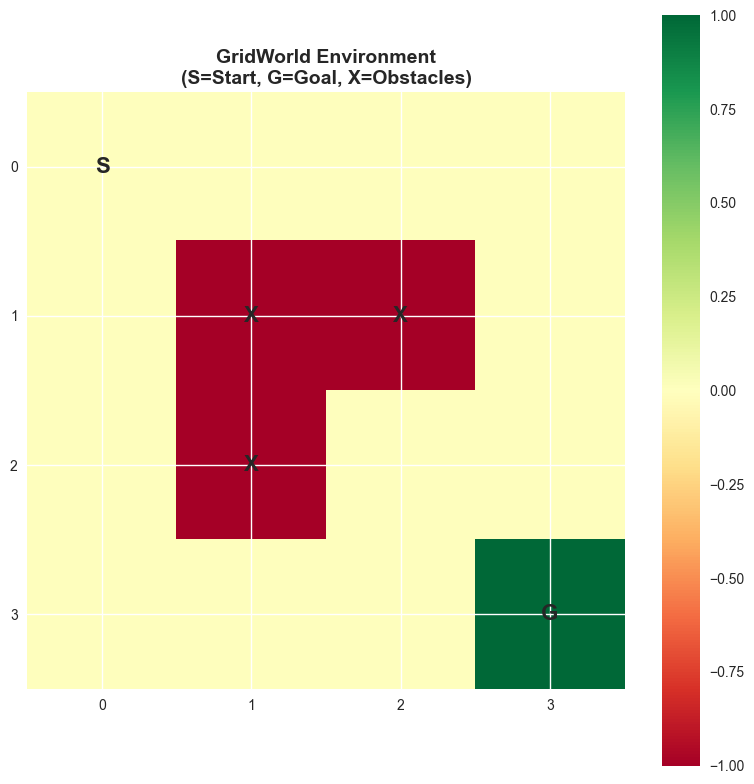

GridWorld Environment Created!
States: 16
Actions: ['up', 'down', 'left', 'right']
Start State: (0, 0)
Goal State: (3, 3)
Obstacles: [(1, 1), (2, 1), (1, 2)]


In [2]:
class GridWorld:
    """
    A simple GridWorld environment for demonstrating MDP concepts.
    
    The agent starts at (0,0) and tries to reach the goal at (3,3).
    There are obstacles and different reward structures.
    """
    
    def __init__(self, size=4, goal_reward=10, step_reward=-0.1, obstacle_reward=-5):
        self.size = size
        self.goal_reward = goal_reward
        self.step_reward = step_reward
        self.obstacle_reward = obstacle_reward
        
        # Define states, actions
        self.states = [(i, j) for i in range(size) for j in range(size)]
        self.actions = ['up', 'down', 'left', 'right']
        self.action_effects = {
            'up': (-1, 0),
            'down': (1, 0),
            'left': (0, -1),
            'right': (0, 1)
        }
        
        # Define special states
        self.start_state = (0, 0)
        self.goal_state = (3, 3)
        self.obstacles = [(1, 1), (2, 1), (1, 2)]  # Obstacle positions
        
        # Initialize transition probabilities and rewards
        self._build_transition_model()
        
    def _build_transition_model(self):
        """Build transition probability and reward models"""
        self.P = {}  # P[s][a] = [(prob, next_state, reward)]
        
        for state in self.states:
            self.P[state] = {}
            for action in self.actions:
                self.P[state][action] = self._get_transitions(state, action)
    
    def _get_transitions(self, state, action):
        """Get possible transitions for a state-action pair"""
        if state == self.goal_state:
            # Terminal state
            return [(1.0, state, 0)]
        
        if state in self.obstacles:
            # Can't take actions from obstacle states
            return [(1.0, state, self.obstacle_reward)]
        
        # Calculate intended next state
        dx, dy = self.action_effects[action]
        next_x, next_y = state[0] + dx, state[1] + dy
        
        # Check boundaries
        if (next_x < 0 or next_x >= self.size or 
            next_y < 0 or next_y >= self.size):
            next_state = state  # Stay in same state if hitting boundary
        else:
            next_state = (next_x, next_y)
        
        # Calculate reward
        if next_state == self.goal_state:
            reward = self.goal_reward
        elif next_state in self.obstacles:
            reward = self.obstacle_reward
        else:
            reward = self.step_reward
        
        # For simplicity, we'll use deterministic transitions
        # In practice, you might add noise (e.g., 0.8 prob intended direction,
        # 0.1 prob each perpendicular direction)
        return [(1.0, next_state, reward)]
    
    def get_valid_actions(self, state):
        """Get valid actions from a given state"""
        if state == self.goal_state or state in self.obstacles:
            return []
        return self.actions.copy()
    
    def visualize_grid(self, values=None, policy=None, title="GridWorld"):
        """Visualize the grid world with optional value function or policy"""
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        
        # Create grid
        grid = np.zeros((self.size, self.size))
        
        # Mark special states
        for i, j in self.obstacles:
            grid[i, j] = -1  # Obstacles
        
        goal_i, goal_j = self.goal_state
        grid[goal_i, goal_j] = 1  # Goal
        
        # Add values if provided
        if values is not None:
            for i in range(self.size):
                for j in range(self.size):
                    if (i, j) not in self.obstacles and (i, j) != self.goal_state:
                        grid[i, j] = values.get((i, j), 0)
        
        # Plot grid
        im = ax.imshow(grid, cmap='RdYlGn', aspect='equal')
        
        # Add text annotations
        for i in range(self.size):
            for j in range(self.size):
                if (i, j) == self.goal_state:
                    ax.text(j, i, 'G', ha='center', va='center', fontsize=16, fontweight='bold')
                elif (i, j) in self.obstacles:
                    ax.text(j, i, 'X', ha='center', va='center', fontsize=16, fontweight='bold')
                elif (i, j) == self.start_state:
                    ax.text(j, i, 'S', ha='center', va='center', fontsize=16, fontweight='bold')
                elif values is not None:
                    ax.text(j, i, f'{values.get((i, j), 0):.2f}', 
                           ha='center', va='center', fontsize=10)
        
        # Add policy arrows if provided
        if policy is not None:
            arrow_map = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→'}
            for state, action in policy.items():
                if state not in self.obstacles and state != self.goal_state:
                    i, j = state
                    if action in arrow_map:
                        ax.text(j, i-0.3, arrow_map[action], ha='center', va='center', 
                               fontsize=12, fontweight='bold', color='blue')
        
        ax.set_xticks(range(self.size))
        ax.set_yticks(range(self.size))
        ax.set_title(title, fontsize=14, fontweight='bold')
        plt.colorbar(im)
        plt.tight_layout()
        plt.show()

# Create and visualize the environment
env = GridWorld()
env.visualize_grid(title="GridWorld Environment\n(S=Start, G=Goal, X=Obstacles)")

print("GridWorld Environment Created!")
print(f"States: {len(env.states)}")
print(f"Actions: {env.actions}")
print(f"Start State: {env.start_state}")
print(f"Goal State: {env.goal_state}")
print(f"Obstacles: {env.obstacles}")

### 🎮 Understanding Our GridWorld Environment

Before we dive into the code, let's understand what we're building:

#### **The GridWorld Setup**
```
(0,0) → → → (0,3)
  ↓   X X     ↓
  ↓   X ◯     ↓  
(3,0) → → → (3,3) 🎯
```

**Legend:**
- `S` at (0,0): Starting position
- `🎯` at (3,3): Goal (treasure!)
- `X`: Obstacles (walls or pits)
- `◯`: Regular empty spaces
- Arrows: Possible movements

#### **Why This Environment is Perfect for Learning**

1. **Small & Manageable**: 4×4 grid = 16 states (easy to visualize)
2. **Clear Objective**: Get from start to goal
3. **Interesting Obstacles**: Forces strategic thinking
4. **Deterministic**: Same action always leads to same result (for now)

#### **Reward Structure Explained**
- **Goal Reward (+10)**: Big positive reward for reaching the treasure
- **Step Penalty (-0.1)**: Small negative reward for each move (encourages efficiency)
- **Obstacle Penalty (-5)**: Big negative reward for hitting obstacles (safety first!)

**Why these specific values?**
- Goal reward is much larger than step penalty → encourages reaching the goal
- Obstacle penalty is significant → discourages dangerous moves
- Step penalty is small → prevents infinite wandering without being too harsh

#### **State Representation**
Each state is a tuple (row, column):
- (0,0) = top-left corner
- (3,3) = bottom-right corner  
- States are like GPS coordinates for our agent

## Part 2: Policy Definition and Evaluation

### Exercise 2.1: Define Different Policies

**Definition:**
A policy π(a|s) defines the probability of taking action a in state s. It's the agent's strategy for choosing actions.

**Mathematical Representation:**
$$\pi(a|s) = P(\text{Action} = a | \text{State} = s)$$

**Types of Policies:**
-   **Deterministic Policy**: π(a|s) ∈ {0, 1} - always chooses the same action in a given state
-   **Stochastic Policy**: π(a|s) ∈ [0, 1] - chooses actions probabilistically

**Policies We'll Implement:**

1. **Random Policy**: Equal probability for all valid actions
2. **Greedy Policy**: Always move towards the goal  
3. **Custom Policy**: Your own strategic policy

---

### Exercise 2.2: Policy Evaluation

**Definition:**
Policy evaluation computes the value function V^π(s) for a given policy π. It answers: "How good is this policy?"

**Iterative Policy Evaluation Algorithm:**

1. **Initialize**: V(s) = 0 for all states s
2. **Repeat until convergence**:
   - For each state s:
     - V_new(s) = Σ_a π(a|s) Σ_{s'} P(s'|s,a)[R(s,a,s') + γV(s')]
3. **Return**: Converged value function V

**Convergence Condition:**
max_s |V_new(s) - V_old(s)| < θ (where θ is a small threshold, e.g., 1e-6)

**Intuition:**
We start with all state values at zero and iteratively update them based on the Bellman equation until they stabilize. It's like repeatedly asking "If I follow this policy, how much reward will I get?" until the answer stops changing.

### 🧭 Policy Deep Dive: Understanding Different Strategies

**What is a Policy?**
A policy is like a GPS navigation system for our agent. It tells the agent what to do in every possible situation.

**Mathematical Definition:**
π(a|s) = probability of taking action a when in state s

---

### 📋 Types of Policies We'll Implement

**1. Random Policy** 🎲

**Strategy:** "When in doubt, flip a coin"

**Mathematical Definition:** π(a|s) = 1/|valid_actions| for all valid actions

**Example:** At state (1,0), if we can go [up, down, right], each has 33.33% probability

**Advantages:**
-   Explores all possibilities equally
-   Simple to implement
-   Guarantees exploration

**Disadvantages:**
-   Not very efficient
-   Like wandering randomly in a maze
-   No learning from experience

---

**2. Greedy Policy** 🎯

**Strategy:** "Always move closer to the goal"

**Mathematical Definition:** π(a|s) = 1 if a minimizes distance to goal, 0 otherwise

**Example:** At state (1,0), if goal is at (3,3), prefer "down" and "right"

**Advantages:**
-   Very efficient when it works
-   Direct path to goal
-   Fast convergence

**Disadvantages:**
-   Can get stuck in local optima
-   Might walk into obstacles
-   No exploration of alternative paths

---

**3. Custom Policy** 🎨

**Strategy:** Your creative combination of strategies

**Examples:**
-   **Epsilon-greedy**: 90% greedy, 10% random
-   **Safety-first**: Avoid actions that lead near obstacles
-   **Wall-follower**: Stay close to boundaries

---

### 🎮 Real-World Analogies

**Policy vs Strategy in Games:**

Think of different video game playing styles:
-   **Aggressive player**: Always attacks (deterministic policy)
-   **Defensive player**: Always defends (deterministic policy)
-   **Adaptive player**: 70% attack, 30% defend (stochastic policy)

**Why Stochastic Policies?**

Sometimes randomness helps:
-   **Exploration**: Discover new paths you wouldn't normally try
-   **Unpredictability**: In competitive games, being predictable is bad
-   **Robustness**: Handle uncertainty in the environment

**Restaurant Choice Analogy:**
-   **Random Policy**: Pick restaurants randomly
-   **Greedy Policy**: Always go to your current favorite
-   **Epsilon-greedy Policy**: Usually go to favorite, sometimes try something new

In [3]:
class Policy:
    """Base class for policies"""
    
    def __init__(self, env):
        self.env = env
        
    def get_action_prob(self, state, action):
        """Return probability of taking action in state"""
        raise NotImplementedError
    
    def get_action_probs(self, state):
        """Return dictionary of action probabilities for state"""
        valid_actions = self.env.get_valid_actions(state)
        if not valid_actions:
            return {}
        
        probs = {}
        for action in valid_actions:
            probs[action] = self.get_action_prob(state, action)
        return probs
    
    def select_action(self, state):
        """Select an action according to policy"""
        probs = self.get_action_probs(state)
        if not probs:
            return None
        
        actions = list(probs.keys())
        probabilities = list(probs.values())
        return np.random.choice(actions, p=probabilities)


class RandomPolicy(Policy):
    """Random policy - equal probability for all valid actions"""
    
    def get_action_prob(self, state, action):
        valid_actions = self.env.get_valid_actions(state)
        if action in valid_actions:
            return 1.0 / len(valid_actions)
        return 0.0


class GreedyPolicy(Policy):
    """Greedy policy - always move towards goal"""
    
    def get_action_prob(self, state, action):
        if state == self.env.goal_state or state in self.env.obstacles:
            return 0.0
        
        # Calculate Manhattan distance to goal for each action
        goal_x, goal_y = self.env.goal_state
        current_x, current_y = state
        
        best_actions = []
        min_distance = float('inf')
        
        for act in self.env.get_valid_actions(state):
            dx, dy = self.env.action_effects[act]
            next_x, next_y = current_x + dx, current_y + dy
            
            # Check if next state is valid
            if (0 <= next_x < self.env.size and 0 <= next_y < self.env.size 
                and (next_x, next_y) not in self.env.obstacles):
                
                distance = abs(next_x - goal_x) + abs(next_y - goal_y)
                
                if distance < min_distance:
                    min_distance = distance
                    best_actions = [act]
                elif distance == min_distance:
                    best_actions.append(act)
        
        if action in best_actions:
            return 1.0 / len(best_actions)
        return 0.0


# Test the policies
random_policy = RandomPolicy(env)
greedy_policy = GreedyPolicy(env)

# Test random policy
print("Random Policy Example:")
test_state = (1, 0)
print(f"State: {test_state}")
print(f"Valid actions: {env.get_valid_actions(test_state)}")
print(f"Action probabilities: {random_policy.get_action_probs(test_state)}")

print("\nGreedy Policy Example:")
print(f"State: {test_state}")
print(f"Action probabilities: {greedy_policy.get_action_probs(test_state)}")

# Test action selection
print(f"\nSelected actions from state {test_state}:")
print(f"Random policy: {[random_policy.select_action(test_state) for _ in range(5)]}")
print(f"Greedy policy: {[greedy_policy.select_action(test_state) for _ in range(5)]}")

Random Policy Example:
State: (1, 0)
Valid actions: ['up', 'down', 'left', 'right']
Action probabilities: {'up': 0.25, 'down': 0.25, 'left': 0.25, 'right': 0.25}

Greedy Policy Example:
State: (1, 0)
Action probabilities: {'up': 0.0, 'down': 1.0, 'left': 0.0, 'right': 0.0}

Selected actions from state (1, 0):
Random policy: [np.str_('down'), np.str_('right'), np.str_('left'), np.str_('left'), np.str_('up')]
Greedy policy: [np.str_('down'), np.str_('down'), np.str_('down'), np.str_('down'), np.str_('down')]


Starting Policy Evaluation...

Evaluating Random Policy
Policy evaluation converged after 51 iterations

Sample State Values:
V((0, 0)) = -3.141
V((1, 0)) = -3.617
V((2, 0)) = -3.427
V((3, 0)) = -2.299
V((0, 3)) = -2.299
V((2, 2)) = -1.576


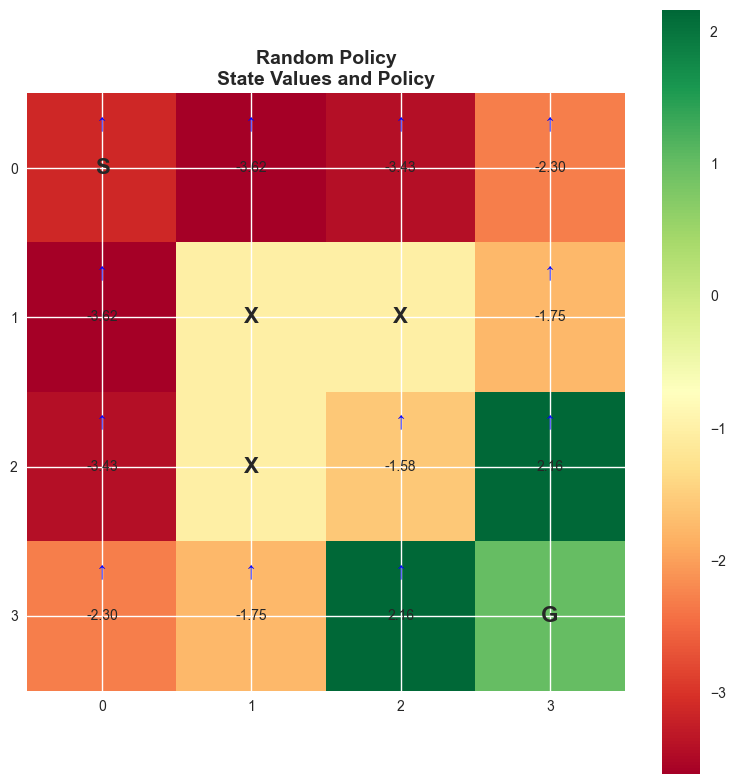


Evaluating Greedy Policy
Policy evaluation converged after 7 iterations

Sample State Values:
V((0, 0)) = 5.495
V((1, 0)) = 6.217
V((2, 0)) = 7.019
V((3, 0)) = 7.910
V((0, 3)) = 7.910
V((2, 2)) = 8.900


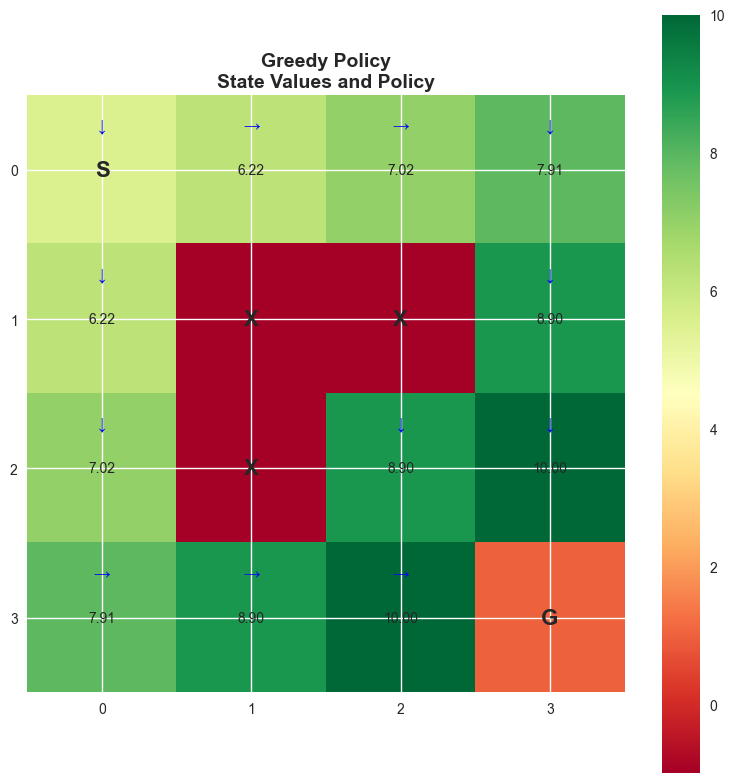

In [4]:
def policy_evaluation(env, policy, gamma=0.9, theta=1e-6, max_iterations=1000):
    """
    Iterative policy evaluation to compute state-value function V^π(s)
    
    Args:
        env: GridWorld environment
        policy: Policy object
        gamma: Discount factor
        theta: Convergence threshold
        max_iterations: Maximum number of iterations
    
    Returns:
        V: Dictionary mapping states to values
    """
    # Initialize value function
    V = {state: 0.0 for state in env.states}
    
    for iteration in range(max_iterations):
        delta = 0.0
        V_new = V.copy()
        
        for state in env.states:
            if state == env.goal_state:
                continue  # Terminal state, value remains 0
                
            # Calculate new value
            v_old = V[state]
            v_new = 0.0
            
            # Get action probabilities for this state
            action_probs = policy.get_action_probs(state)
            
            for action, prob in action_probs.items():
                # Get transitions for this state-action pair
                transitions = env.P[state][action]
                
                for trans_prob, next_state, reward in transitions:
                    v_new += prob * trans_prob * (reward + gamma * V[next_state])
            
            V_new[state] = v_new
            delta = max(delta, abs(v_old - v_new))
        
        V = V_new
        
        # Check for convergence
        if delta < theta:
            print(f"Policy evaluation converged after {iteration + 1} iterations")
            break
    else:
        print(f"Policy evaluation stopped after {max_iterations} iterations")
    
    return V


def evaluate_and_visualize_policy(env, policy, policy_name, gamma=0.9):
    """Evaluate a policy and visualize the results"""
    print(f"\n{'='*50}")
    print(f"Evaluating {policy_name}")
    print('='*50)
    
    # Evaluate policy
    V = policy_evaluation(env, policy, gamma=gamma)
    
    # Print some sample values
    print(f"\nSample State Values:")
    sample_states = [(0,0), (1,0), (2,0), (3,0), (0,3), (2,2)]
    for state in sample_states:
        if state in V:
            print(f"V({state}) = {V[state]:.3f}")
    
    # Create policy dictionary for visualization
    policy_dict = {}
    for state in env.states:
        if state != env.goal_state and state not in env.obstacles:
            action_probs = policy.get_action_probs(state)
            if action_probs:
                # Get most likely action
                best_action = max(action_probs.items(), key=lambda x: x[1])[0]
                policy_dict[state] = best_action
    
    # Visualize
    env.visualize_grid(values=V, policy=policy_dict, 
                      title=f"{policy_name}\nState Values and Policy")
    
    return V


# Evaluate different policies
print("Starting Policy Evaluation...")

# Random Policy
V_random = evaluate_and_visualize_policy(env, random_policy, "Random Policy")

# Greedy Policy  
V_greedy = evaluate_and_visualize_policy(env, greedy_policy, "Greedy Policy")

### 🔍 Understanding Policy Evaluation Step-by-Step

Policy evaluation answers the question: **"How good is each state if I follow this policy?"**

#### **The Intuition**
Imagine you're evaluating different starting positions in a board game:
- Some positions are naturally better (closer to winning)
- Some positions are worse (closer to losing)  
- The "value" of a position depends on how well you'll do from there

#### **Mathematical Breakdown**

**The Bellman Equation for State Values:**
```
V^π(s) = Σ_a π(a|s) × Σ_{s'} P(s'|s,a) × [R(s,a,s') + γ × V^π(s')]
```

**Let's decode this step by step:**

1. **For each possible action a**: π(a|s) = "How likely am I to take action a in state s?"

2. **For each possible next state s'**: P(s'|s,a) = "If I take action a, what's the chance I end up in state s'?"

3. **Calculate immediate reward + future value**: R(s,a,s') + γ × V^π(s')
   - R(s,a,s') = "What reward do I get immediately?"
   - γ × V^π(s') = "What's the discounted future value?"

4. **Sum everything up**: This gives the expected value of being in state s

#### **Simple Example**
Let's say we're at state (2,2) with a random policy:

```python
# Random policy: equal probability for all valid actions
π(up|s) = 0.25, π(down|s) = 0.25, π(left|s) = 0.25, π(right|s) = 0.25

# For action "up" → next state (1,2)
contribution_up = 0.25 × 1.0 × (-0.1 + 0.9 × V(1,2))

# For action "down" → next state (3,2)  
contribution_down = 0.25 × 1.0 × (-0.1 + 0.9 × V(3,2))

# ... and so on for left and right

V(2,2) = contribution_up + contribution_down + contribution_left + contribution_right
```

#### **Why Iterative?**
- We start with V(s) = 0 for all states (initial guess)
- Each iteration improves our estimate using current values
- Eventually, values converge to true values
- Like asking "If I knew the value of my neighbors, what would my value be?"

#### **Convergence Intuition**
Think of it like gossip spreading in a neighborhood:
- Initially, nobody knows the true "gossip" (values)
- Each iteration, neighbors share information  
- Eventually, everyone converges to the same true story

### Exercise 2.3: Create Your Custom Policy

**Task**: Design and implement your own policy. Consider strategies like:
- **Wall-following**: Try to stay close to walls
- **Risk-averse**: Avoid obstacles with higher probability
- **Exploration-focused**: Balance between moving towards goal and exploring

**Your Implementation Below**:

Custom Policy at state (2, 0):
Action probabilities: {'up': 0.11718750000000001, 'down': 0.8828125, 'left': 0.0, 'right': 0.0}

Evaluating Custom Policy
Policy evaluation converged after 46 iterations

Sample State Values:
V((0, 0)) = 3.587
V((1, 0)) = 4.096
V((2, 0)) = 5.388
V((3, 0)) = 6.364
V((0, 3)) = 6.364
V((2, 2)) = 8.367


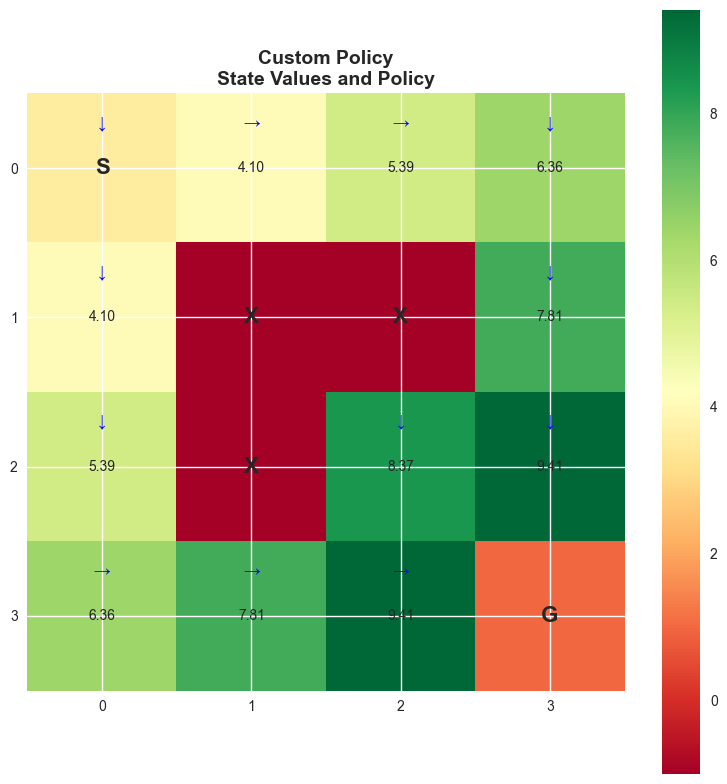

In [7]:
class CustomPolicy(Policy):
    """
    TODO: Implement your custom policy here
    
    Ideas:
    - Combine greedy behavior with some exploration
    - Avoid states near obstacles
    - Use different strategies for different regions of the grid
    """
    
    def __init__(self, env, exploration_prob=0.2):
        super().__init__(env)
        self.exploration_prob = exploration_prob
    
    def get_action_prob(self, state, action):
        """
        Implement custom policy: epsilon-greedy with obstacle avoidance
        
        Strategy:
        1. With probability (1-exploration_prob), prefer greedy actions
        2. With probability exploration_prob, choose randomly among valid actions
        3. Apply penalty for actions that lead near obstacles
        """
        if state == self.env.goal_state or state in self.env.obstacles:
            return 0.0
        
        valid_actions = self.env.get_valid_actions(state)
        if action not in valid_actions:
            return 0.0
        
        # Calculate base probabilities for each action
        goal_x, goal_y = self.env.goal_state
        current_x, current_y = state
        
        # Calculate next position
        dx, dy = self.env.action_effects[action]
        next_x, next_y = current_x + dx, current_y + dy
        
        # Check if next state is valid
        if not (0 <= next_x < self.env.size and 0 <= next_y < self.env.size):
            return 0.0
            
        # Calculate distance to goal from next state
        goal_distance = abs(next_x - goal_x) + abs(next_y - goal_y)
        current_distance = abs(current_x - goal_x) + abs(current_y - goal_y)
        
        # Check if action moves closer to goal
        moves_towards_goal = goal_distance < current_distance
        
        # Check if next state is near obstacles
        near_obstacle = False
        if (next_x, next_y) in self.env.obstacles:
            return 0.0  # Can't move to obstacle
        
        for obs_x, obs_y in self.env.obstacles:
            if abs(next_x - obs_x) + abs(next_y - obs_y) <= 1:
                near_obstacle = True
                break
        
        # Calculate probability based on greedy behavior and exploration
        if moves_towards_goal and not near_obstacle:
            # Best case: moves towards goal and safe
            return (1 - self.exploration_prob) * 0.7 + self.exploration_prob / len(valid_actions)
        elif moves_towards_goal and near_obstacle:
            # Good direction but risky
            return (1 - self.exploration_prob) * 0.2 + self.exploration_prob / len(valid_actions)
        elif not moves_towards_goal and not near_obstacle:
            # Safe but not optimal direction
            return (1 - self.exploration_prob) * 0.1 + self.exploration_prob / len(valid_actions)
        else:
            # Worst case: away from goal and risky
            return self.exploration_prob / len(valid_actions)
    
    def get_action_probs(self, state):
        """Return normalized action probabilities"""
        probs = super().get_action_probs(state)
        
        # Normalize probabilities to ensure they sum to 1
        if probs:
            total = sum(probs.values())
            if total > 0:
                probs = {action: prob / total for action, prob in probs.items()}
        
        return probs

# TODO: Test your custom policy
custom_policy = CustomPolicy(env, exploration_prob=0.3)

# Test the custom policy
test_state = (2, 0)
print(f"Custom Policy at state {test_state}:")
print(f"Action probabilities: {custom_policy.get_action_probs(test_state)}")

# Evaluate the custom policy
V_custom = evaluate_and_visualize_policy(env, custom_policy, "Custom Policy")

## Part 3: Action-Value Functions (Q-Functions)

### Exercise 3.1: Computing Q-Values

**Definition:**
The action-value function Q^π(s,a) represents the expected return when taking action a in state s and then following policy π.

**Key Question Q-Functions Answer:**
Q-functions answer: "What if I take this specific action here, then follow my policy?"

**Mathematical Relationships:**

**V from Q (Policy-weighted average):**
$$V^π(s) = \sum_a π(a|s) Q^π(s,a)$$

**Q from V (Bellman backup):**
$$Q^π(s,a) = \sum_{s'} P(s'|s,a)[R(s,a,s') + γV^π(s')]$$

**Bellman Equation for Q:**
$$Q^π(s,a) = \sum_{s'} P(s'|s,a)[R(s,a,s') + γ \sum_{a'} π(a'|s')Q^π(s',a')]$$

**Intuition:**
-   **V(s)**: "How good is this state?" (following current policy)
-   **Q(s,a)**: "How good is this specific action?" (then following policy)

The V-Q relationship is like asking:
-   V: "How well will I do from this chess position?"
-   Q: "How well will I do if I move my queen here, then play normally?"

### 🎯 Q-Functions Deep Dive: The "What If" Values

**Core Concept:**
Q-functions provide action-specific evaluations, allowing us to compare different choices directly.

---

### 🍕 Restaurant Decision Analogy

**Scenario:** You're choosing a restaurant from downtown location.

**Value Functions:**
-   **V(downtown)** = 7.5 → "Average satisfaction from this location with my usual choices"
-   **Q(downtown, pizza_place)** = 8.2 → "Satisfaction if I specifically choose pizza"
-   **Q(downtown, sushi_place)** = 6.8 → "Satisfaction if I specifically choose sushi"
-   **Q(downtown, burger_place)** = 7.1 → "Satisfaction if I specifically choose burgers"

**Policy Calculation:**
If my policy is 50% pizza, 30% sushi, 20% burgers:
V(downtown) = 0.5×8.2 + 0.3×6.8 + 0.2×7.1 = 4.1 + 2.04 + 1.42 = 7.56 ✓

---

### 🧮 Mathematical Relationships Explained

**1. V from Q (Weighted Average):**
$$V^π(s) = \sum_a π(a|s) × Q^π(s,a)$$

**Interpretation:** State value = probability of each action × value of that action

**2. Q from V (Bellman Backup):**
$$Q^π(s,a) = \sum_{s'} P(s'|s,a) × [R(s,a,s') + γV^π(s')]$$

**Interpretation:** Action value = immediate reward + discounted future state value

---

### 🔥 Why Q-Functions Matter

**1. Direct Action Comparison:**
-   Q(s, left) = 5.2 vs Q(s, right) = 7.8 → choose right!
-   No need to compute state values first

**2. Policy Improvement:**
-   π_new(s) = argmax_a Q^π_old(s,a)
-   Directly find the best action

**3. Optimal Decision Making:**
-   Q*(s,a) tells us the value of each action under optimal behavior
-   Essential for Q-learning algorithms

---

### 📊 Visual Understanding

Think of Q-values as action-specific "heat maps":
-   **Hot spots** (high Q-values): Good actions to take
-   **Cold spots** (low Q-values): Actions to avoid
-   **Separate map for each action**: Q(s,↑), Q(s,↓), Q(s,←), Q(s,→)

**GridWorld Example:**
-   Q(state, "toward_goal") typically has higher values
-   Q(state, "toward_obstacle") typically has lower values
-   Q(state, "toward_wall") often has negative values  
- Like: "Restaurant satisfaction = meal quality + how I'll feel tomorrow"

#### **Why Q-Functions Matter**

1. **Better Decision Making**: Q-values directly tell us which action is best
   - max_a Q(s,a) gives the best action in state s

2. **Policy Improvement**: We can improve policies by being greedy w.r.t. Q-values
   - π_new(s) = argmax_a Q^π_old(s,a)

3. **Action Comparison**: Compare different actions in the same state
   - "Should I go left or right from here?"

#### **Visual Understanding**
Think of Q-values as a "heat map" for each action:
- **Hot spots** (high Q-values): Good actions to take
- **Cold spots** (low Q-values): Actions to avoid  
- **Different maps for each action**: Q(s,up), Q(s,down), Q(s,left), Q(s,right)

#### **Common Confusion: V vs Q**
- **V(s)**: "How good is my current strategy from this position?"
- **Q(s,a)**: "How good is this specific move, then using my strategy?"

It's like asking:
- V: "How well will I do in this chess position?" 
- Q: "How well will I do if I move my queen here, then play normally?"

Computing Q-values for Greedy Policy...
Verification of V-Q relationship:
State		V(direct)	V(from Q)	Difference
------------------------------------------------------------
(0, 0)		5.4954		5.4954		0.000000
(1, 0)		6.2171		6.2171		0.000000
(2, 0)		7.0190		7.0190		0.000000
(0, 1)		6.2171		6.2171		0.000000


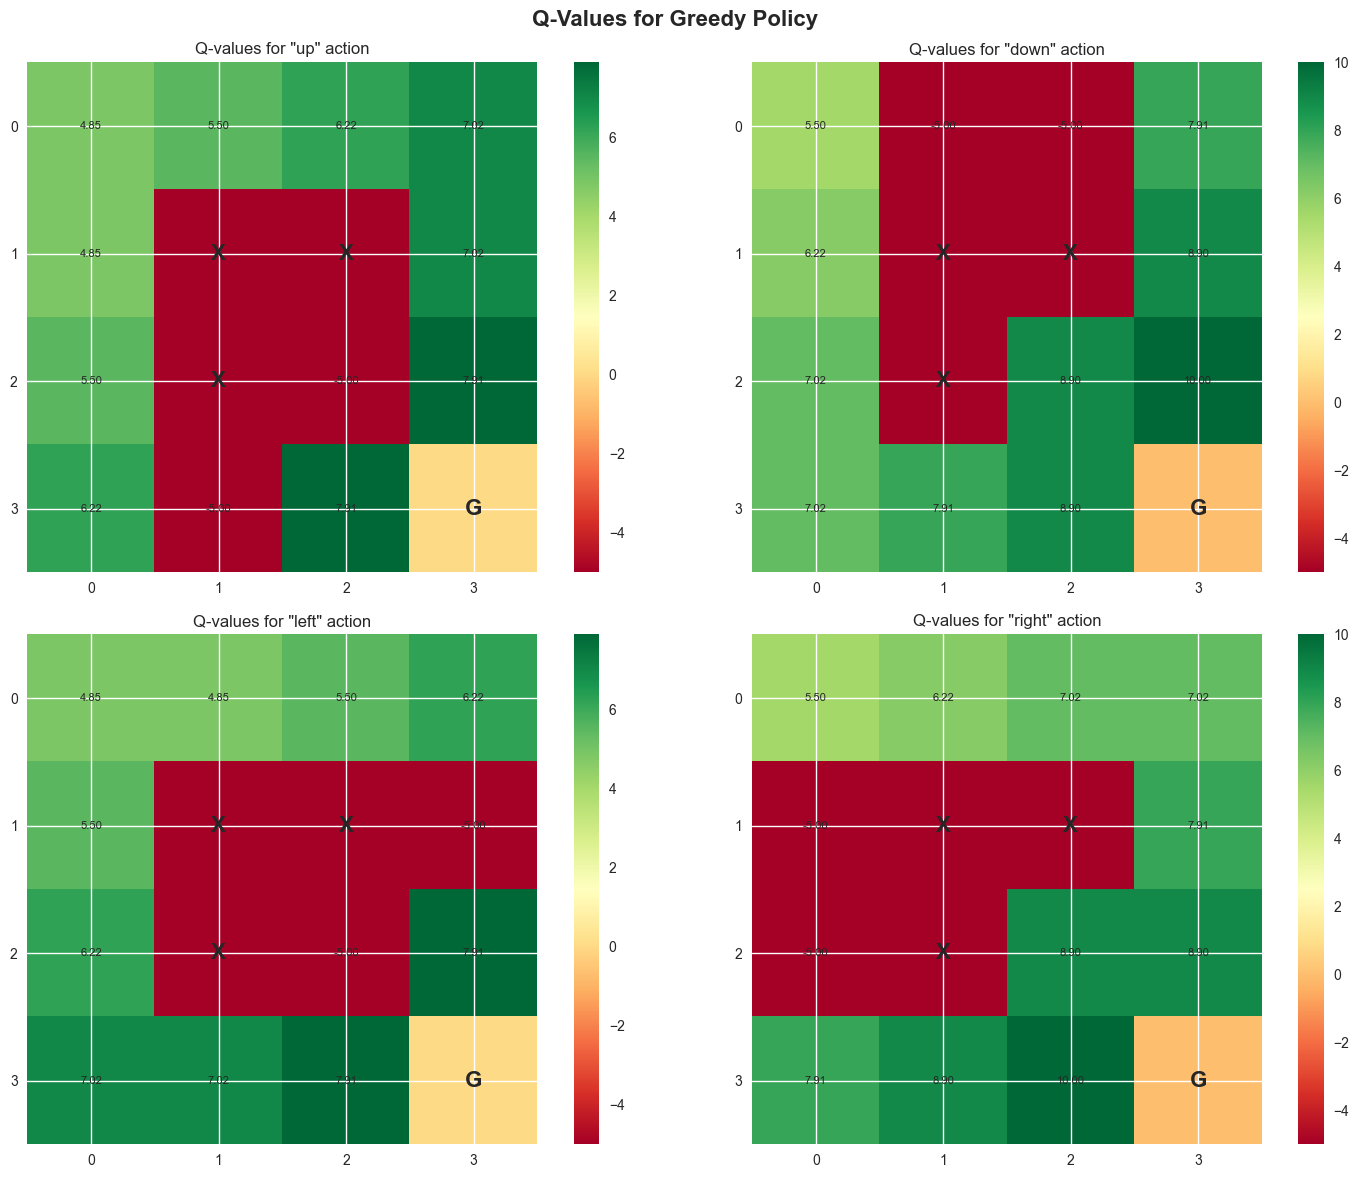

In [8]:
def compute_q_from_v(env, V, gamma=0.9):
    """
    Compute Q-values from state values using:
    Q(s,a) = Σ_{s'} P(s'|s,a)[R(s,a,s') + γV(s')]
    """
    Q = {}
    
    for state in env.states:
        Q[state] = {}
        for action in env.actions:
            if state == env.goal_state:
                Q[state][action] = 0.0
                continue
                
            q_value = 0.0
            transitions = env.P[state][action]
            
            for prob, next_state, reward in transitions:
                q_value += prob * (reward + gamma * V[next_state])
            
            Q[state][action] = q_value
    
    return Q


def compute_v_from_q(env, Q, policy):
    """
    Compute state values from Q-values using:
    V(s) = Σ_a π(a|s) Q(s,a)
    """
    V = {}
    
    for state in env.states:
        if state == env.goal_state:
            V[state] = 0.0
            continue
            
        v_value = 0.0
        action_probs = policy.get_action_probs(state)
        
        for action, prob in action_probs.items():
            v_value += prob * Q[state][action]
        
        V[state] = v_value
    
    return V


def visualize_q_values(env, Q, title="Q-Values"):
    """Visualize Q-values for all state-action pairs"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    actions = ['up', 'down', 'left', 'right']
    
    for idx, action in enumerate(actions):
        ax = axes[idx // 2, idx % 2]
        
        # Create grid for this action
        q_grid = np.zeros((env.size, env.size))
        
        for i in range(env.size):
            for j in range(env.size):
                state = (i, j)
                if state in Q and action in Q[state]:
                    q_grid[i, j] = Q[state][action]
        
        # Plot
        im = ax.imshow(q_grid, cmap='RdYlGn', aspect='equal')
        ax.set_title(f'Q-values for "{action}" action')
        
        # Add text annotations
        for i in range(env.size):
            for j in range(env.size):
                state = (i, j)
                if state == env.goal_state:
                    ax.text(j, i, 'G', ha='center', va='center', 
                           fontsize=16, fontweight='bold')
                elif state in env.obstacles:
                    ax.text(j, i, 'X', ha='center', va='center', 
                           fontsize=16, fontweight='bold')
                else:
                    if state in Q and action in Q[state]:
                        ax.text(j, i, f'{Q[state][action]:.2f}', 
                               ha='center', va='center', fontsize=8)
        
        ax.set_xticks(range(env.size))
        ax.set_yticks(range(env.size))
        plt.colorbar(im, ax=ax)
    
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


# Compute Q-values for the greedy policy
print("Computing Q-values for Greedy Policy...")
Q_greedy = compute_q_from_v(env, V_greedy, gamma=0.9)

# Verify V-Q relationship
V_from_Q = compute_v_from_q(env, Q_greedy, greedy_policy)

print("Verification of V-Q relationship:")
print("State\t\tV(direct)\tV(from Q)\tDifference")
print("-" * 60)
for state in [(0,0), (1,0), (2,0), (0,1)]:
    if state in V_greedy:
        diff = abs(V_greedy[state] - V_from_Q[state])
        print(f"{state}\t\t{V_greedy[state]:.4f}\t\t{V_from_Q[state]:.4f}\t\t{diff:.6f}")

# Visualize Q-values
visualize_q_values(env, Q_greedy, "Q-Values for Greedy Policy")

## Part 4: Policy Improvement and Policy Iteration

### Exercise 4.1: Policy Improvement

**Definition:**
Given a value function V^π, we can improve the policy by being greedy with respect to the action-value function.

**Policy Improvement Formula:**
$$π'(s) = \arg\max_a Q^π(s,a) = \arg\max_a \sum_{s'} P(s'|s,a)[R(s,a,s') + γV^π(s')]$$

**Interpretation:** Choose the action that maximizes expected return from each state.

**Policy Improvement Theorem:**
If π' is greedy with respect to V^π, then V^π'(s) ≥ V^π(s) for all states s.

**Translation:** "If I always choose the best action based on my current understanding, I can only do better (or at least as well)."

---

### Exercise 4.2: Policy Iteration Algorithm

**Policy Iteration Steps:**

1. **Initialize**: Start with arbitrary policy π₀
2. **Repeat until convergence**:
   - **Policy Evaluation**: Compute V^π_k (solve Bellman equation)
   - **Policy Improvement**: π_{k+1}(s) = argmax_a Q^π_k(s,a)
3. **Output**: Optimal policy π* and value function V*

**Convergence Guarantee:** Policy iteration is guaranteed to converge to the optimal policy in finite time for finite MDPs.

**Why It Works:**
-   Each step produces a better (or equal) policy
-   There are only finitely many deterministic policies
-   Must eventually reach optimal policy

### 🚀 Policy Improvement Deep Dive: Making Better Decisions

**Core Idea:** Use the value function to make better action choices.

---

### 📚 Learning Process Analogy

**Scenario:** You're learning to play chess.

**Policy Evaluation:** "How good is my current playing style?"
-   Analyze your current strategy
-   Evaluate typical game outcomes
-   Identify strengths and weaknesses

**Policy Improvement:** "How can I play better?"
-   Look at each position where you made suboptimal moves
-   Replace bad moves with better alternatives
-   Update your playing strategy

**Policy Iteration:** Repeat this cycle until you can't improve further.

---

### 🧮 Mathematical Foundations

**Policy Improvement Theorem:**
If π' is greedy w.r.t. V^π, then V^π'(s) ≥ V^π(s) for all s.

**Proof Intuition:**
1. **Greedy Action**: Choose a such that Q^π(s,a) is maximized
2. **Definition**: Q^π(s,a) ≥ V^π(s) for the chosen action
3. **New Policy**: π'(s) gives this optimal action
4. **Result**: V^π'(s) ≥ V^π(s)

**Why Greedy Improvement Works:**
-   Current policy chooses actions with average value V^π(s)
-   Greedy policy chooses action with maximum value Q^π(s,a)
-   Maximum ≥ Average, so new policy is better

---

### 🔄 Policy Iteration: The Complete Cycle

**Step 1 - Policy Evaluation:** "How good is my current policy?"
```
V^π(s) ← Expected return following π from state s
```

**Step 2 - Policy Improvement:** "What's the best action in each state?"
```
π'(s) ← Action that maximizes Q^π(s,a)
```

**Step 3 - Check Convergence:** "Did my policy change?"
```
If π'(s) = π(s) for all s: STOP (optimal found)
Else: π ← π' and repeat
```

---

### 🎯 Key Properties

**1. Monotonic Improvement:**
V^π₀ ≤ V^π₁ ≤ V^π₂ ≤ ... ≤ V^π*

**2. Finite Convergence:**
Algorithm terminates in finite steps (for finite MDPs)

**3. Optimal Solution:**
Final policy π* is optimal: V^π* = V*

**4. Model-Based:**
Requires knowledge of transition probabilities P(s'|s,a) and rewards R(s,a,s')

Think of a student improving their study strategy:

1. **Current Strategy** (Policy π): "I study randomly for 2 hours"
2. **Evaluate Strategy** (Policy Evaluation): "How well does this work for each subject?"  
3. **Find Better Strategy** (Policy Improvement): "Math needs 3 hours, History needs 1 hour"
4. **Repeat**: Keep refining until no more improvements possible

#### **Mathematical Intuition**

**Policy Improvement Theorem**: If Q^π(s,a) > V^π(s) for some action a, then taking action a is better than following policy π.

**Translation**: "If doing action a gives higher value than my current average, I should do action a more often!"

**Greedy Improvement**:
```python
π_new(s) = argmax_a Q^π(s,a)
```
"Always choose the action with highest Q-value"

#### **Why Does This Work?**

**Monotonic Improvement**: Each policy improvement step makes the policy at least as good, usually better.

**Proof Sketch**:
- If we're greedy w.r.t. Q^π, we get V^π_new ≥ V^π
- "If I always choose the best available action, I can't do worse"

#### **Policy Iteration: The Complete Algorithm**

**The Cycle**:
```
Random Policy → Evaluate → Improve → Evaluate → Improve → ... → Optimal Policy
```

**Why It Converges**:
1. **Finite State/Action Space**: Limited number of possible policies
2. **Monotonic Improvement**: Each step makes policy better (or same)
3. **No Cycles**: Can't go backwards to a worse policy
4. **Must Terminate**: Eventually reach optimal policy

#### **Real-World Example: Learning to Drive**

**Iteration 1**:
- **Policy**: "Drive slowly everywhere" 
- **Evaluation**: "Safe but inefficient on highways"
- **Improvement**: "Drive fast on highways, slow in neighborhoods"

**Iteration 2**:
- **Policy**: "Speed varies by road type"
- **Evaluation**: "Good, but inefficient in traffic"  
- **Improvement**: "Also consider traffic conditions"

**Final Policy**: "Optimal speed based on road type, traffic, weather, etc."

#### **Key Insights**

1. **Guaranteed Improvement**: Policy iteration always finds the optimal policy (for finite MDPs)

2. **Fast Convergence**: Usually converges in just a few iterations

3. **No Exploration Needed**: Uses complete model knowledge (unlike Q-learning later)

4. **Computational Cost**: Each iteration requires solving the Bellman equation

#### **Common Pitfalls**
- **Getting Stuck**: In stochastic environments, might need exploration
- **Computational Cost**: Policy evaluation can be expensive  
- **Model Required**: Need to know P(s'|s,a) and R(s,a,s')

Policy Iteration Experiment:
Starting from Random Policy
Starting Policy Iteration...

Iteration 1:
  - Policy Evaluation...
Policy evaluation converged after 67 iterations
  - Policy Improvement...
  → Policy changed, continuing...

Iteration 2:
  - Policy Evaluation...
Policy evaluation converged after 154 iterations
  - Policy Improvement...
  → Policy changed, continuing...

Iteration 3:
  - Policy Evaluation...
Policy evaluation converged after 31 iterations
  - Policy Improvement...
  → Policy changed, continuing...

Iteration 4:
  - Policy Evaluation...
Policy evaluation converged after 7 iterations
  - Policy Improvement...

  ✓ Policy converged after 4 iterations!

Policy Iteration completed!
Total iterations: 4


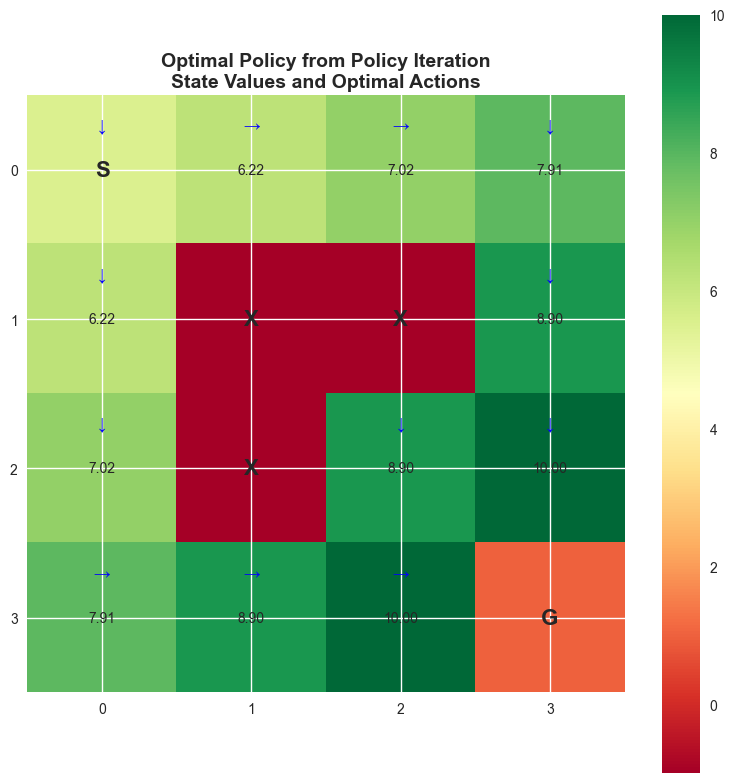

In [9]:
class GreedyActionPolicy(Policy):
    """Policy that is greedy with respect to given Q-values"""
    
    def __init__(self, env, Q):
        super().__init__(env)
        self.Q = Q
    
    def get_action_prob(self, state, action):
        if state == self.env.goal_state or state in self.env.obstacles:
            return 0.0
        
        valid_actions = self.env.get_valid_actions(state)
        if not valid_actions or action not in valid_actions:
            return 0.0
        
        # Find the best action(s)
        best_value = max(self.Q[state][a] for a in valid_actions)
        best_actions = [a for a in valid_actions if abs(self.Q[state][a] - best_value) < 1e-10]
        
        if action in best_actions:
            return 1.0 / len(best_actions)
        return 0.0


def policy_improvement(env, V, gamma=0.9):
    """
    Improve policy by being greedy with respect to value function
    Returns the new policy and whether it's different from greedy policy based on V
    """
    # Compute Q-values from V
    Q = compute_q_from_v(env, V, gamma)
    
    # Create greedy policy
    improved_policy = GreedyActionPolicy(env, Q)
    
    return improved_policy, Q


def policy_iteration(env, initial_policy=None, gamma=0.9, max_iterations=100):
    """
    Policy iteration algorithm
    
    Returns:
        - Final policy
        - List of value functions for each iteration
        - List of policies for each iteration
    """
    if initial_policy is None:
        initial_policy = RandomPolicy(env)
    
    policy = initial_policy
    V_history = []
    policy_history = []
    
    print("Starting Policy Iteration...")
    print("=" * 50)
    
    for iteration in range(max_iterations):
        print(f"\nIteration {iteration + 1}:")
        
        # Policy Evaluation
        print("  - Policy Evaluation...")
        V = policy_evaluation(env, policy, gamma=gamma, theta=1e-8)
        V_history.append(V.copy())
        
        # Policy Improvement
        print("  - Policy Improvement...")
        new_policy, Q = policy_improvement(env, V, gamma)
        
        # Check if policy has converged by comparing action selections
        policy_changed = False
        for state in env.states:
            if state != env.goal_state and state not in env.obstacles:
                old_probs = policy.get_action_probs(state)
                new_probs = new_policy.get_action_probs(state)
                
                # Check if the greedy actions are different
                if old_probs and new_probs:
                    old_best = max(old_probs.items(), key=lambda x: x[1])[0]
                    new_best = max(new_probs.items(), key=lambda x: x[1])[0]
                    if old_best != new_best:
                        policy_changed = True
                        break
        
        policy_history.append(policy)
        
        if not policy_changed:
            print(f"\n  ✓ Policy converged after {iteration + 1} iterations!")
            break
        else:
            print("  → Policy changed, continuing...")
            policy = new_policy
    
    else:
        print(f"\n  ⚠ Maximum iterations ({max_iterations}) reached")
    
    return new_policy, V_history, policy_history


# Run Policy Iteration starting from Random Policy
print("Policy Iteration Experiment:")
print("Starting from Random Policy")

optimal_policy, V_history, policy_history = policy_iteration(
    env, RandomPolicy(env), gamma=0.9, max_iterations=10
)

print(f"\nPolicy Iteration completed!")
print(f"Total iterations: {len(V_history)}")

# Visualize the final optimal policy
final_V = V_history[-1]

# Create policy dictionary for visualization
optimal_policy_dict = {}
for state in env.states:
    if state != env.goal_state and state not in env.obstacles:
        action_probs = optimal_policy.get_action_probs(state)
        if action_probs:
            best_action = max(action_probs.items(), key=lambda x: x[1])[0]
            optimal_policy_dict[state] = best_action

env.visualize_grid(values=final_V, policy=optimal_policy_dict, 
                  title="Optimal Policy from Policy Iteration\nState Values and Optimal Actions")

In [10]:
# Let's add a simple demonstration to understand policy iteration better

def simple_policy_iteration_demo(env, gamma=0.9):
    """
    A simplified demonstration of how policy iteration works
    This version shows the key steps more clearly
    """
    print("🎯 POLICY ITERATION DEMONSTRATION")
    print("=" * 50)
    
    # Step 1: Start with a random policy
    current_policy = RandomPolicy(env)
    iteration = 0
    
    print(f"\n📍 Starting with Random Policy")
    
    while iteration < 5:  # Limit to 5 iterations for demo
        iteration += 1
        print(f"\n🔄 ITERATION {iteration}")
        print("-" * 30)
        
        # Step 2: Policy Evaluation - "How good is my current policy?"
        print("📊 Step 1: Evaluating current policy...")
        current_values = policy_evaluation(env, current_policy, gamma=gamma, theta=1e-6)
        
        # Show a few sample values
        sample_states = [(0,0), (1,0), (2,0)]
        print("   Sample state values:")
        for state in sample_states:
            if state in current_values:
                print(f"   V({state}) = {current_values[state]:.3f}")
        
        # Step 3: Policy Improvement - "Can I do better?"
        print("🚀 Step 2: Improving policy based on values...")
        
        # Compute Q-values
        Q_values = compute_q_from_v(env, current_values, gamma)
        
        # Create improved policy (greedy w.r.t. Q-values)
        improved_policy = GreedyActionPolicy(env, Q_values)
        
        # Step 4: Check if policy changed
        policy_changed = False
        changes_count = 0
        
        for state in env.states:
            if state != env.goal_state and state not in env.obstacles:
                old_action_probs = current_policy.get_action_probs(state)
                new_action_probs = improved_policy.get_action_probs(state)
                
                if old_action_probs and new_action_probs:
                    # Get the most likely actions
                    old_best = max(old_action_probs.items(), key=lambda x: x[1])[0]
                    new_best = max(new_action_probs.items(), key=lambda x: x[1])[0]
                    
                    if old_best != new_best:
                        policy_changed = True
                        changes_count += 1
        
        print(f"   Policy changes: {changes_count} states")
        
        if not policy_changed:
            print("   ✅ No changes - OPTIMAL POLICY FOUND!")
            break
        else:
            print("   ➡️  Policy improved, continuing...")
            current_policy = improved_policy
    
    return current_policy, current_values

# Let's run a quick demo
print("Running Policy Iteration Demo...")
print("This will show you exactly what happens in each iteration!")

# Uncomment the next line to run the demo
# demo_policy, demo_values = simple_policy_iteration_demo(env, gamma=0.9)

Running Policy Iteration Demo...
This will show you exactly what happens in each iteration!


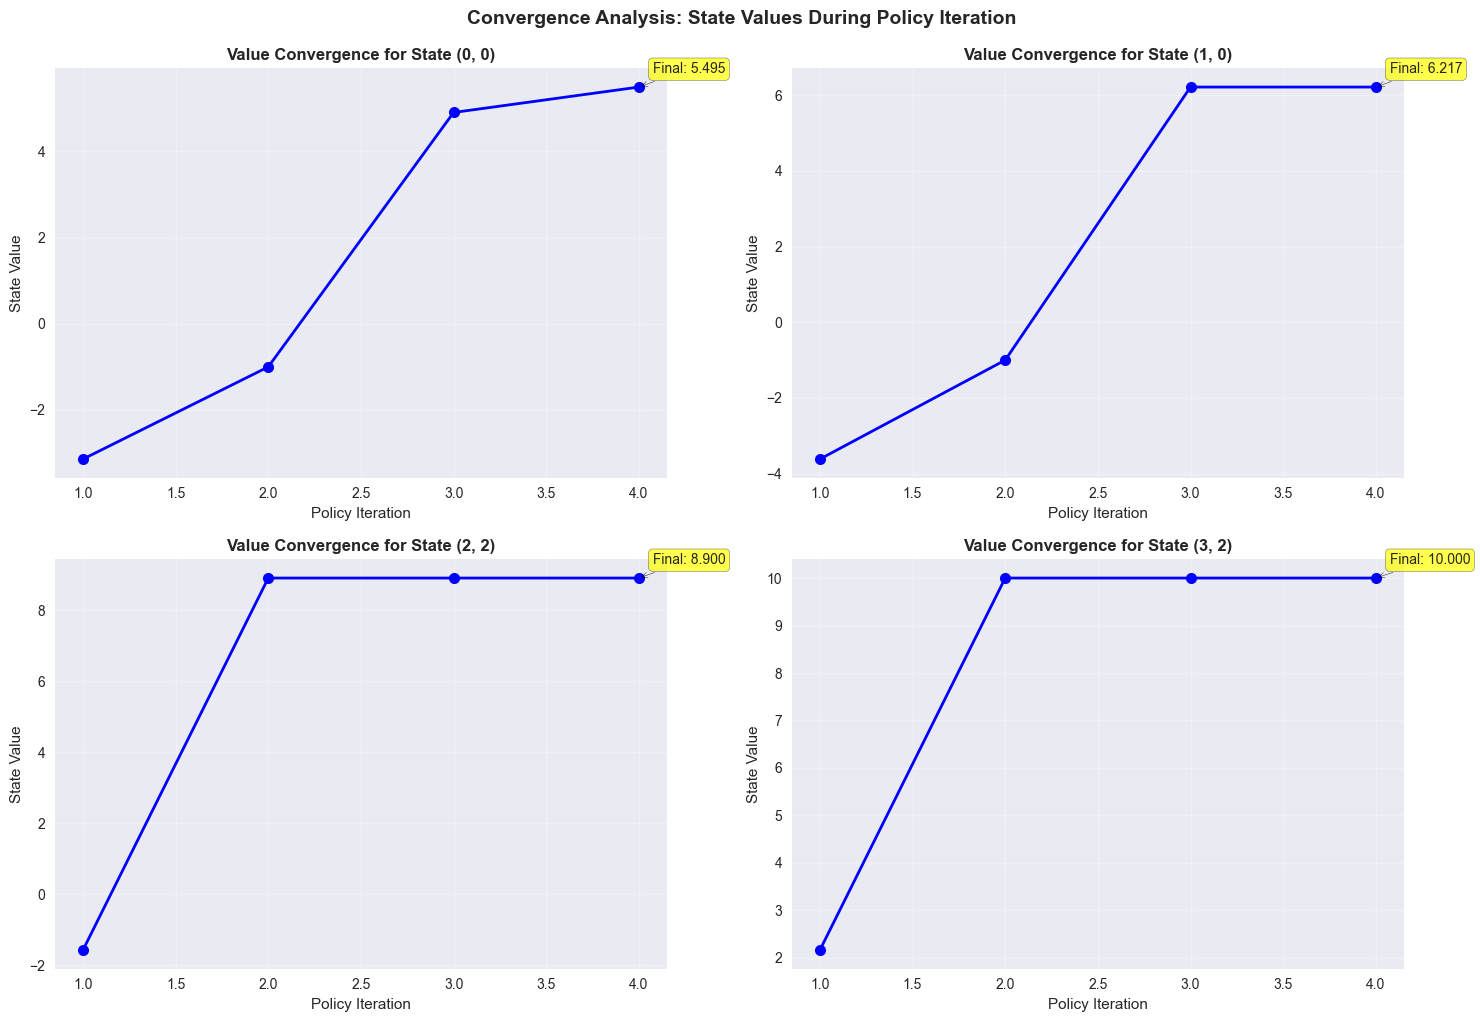

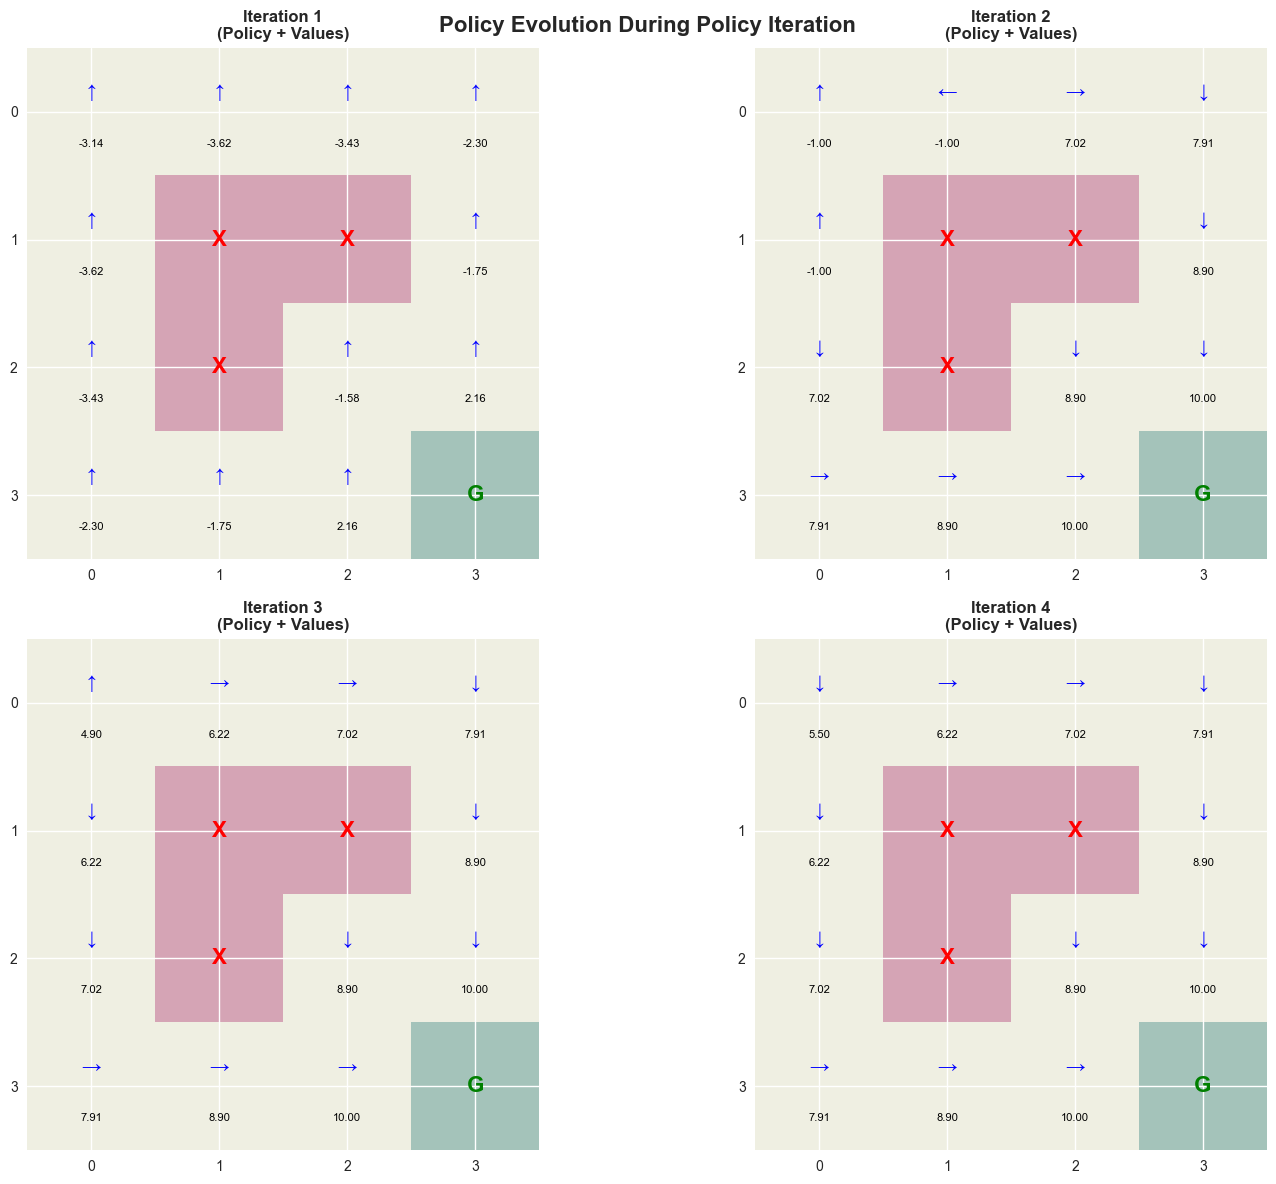

In [11]:
# Analyze convergence
def plot_value_convergence(V_history):
    """Plot how state values converge over iterations"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Select interesting states to track
    tracked_states = [(0, 0), (1, 0), (2, 2), (3, 2)]
    
    for idx, state in enumerate(tracked_states):
        ax = axes[idx // 2, idx % 2]
        
        values = [V[state] for V in V_history]
        iterations = range(1, len(values) + 1)
        
        ax.plot(iterations, values, 'bo-', linewidth=2, markersize=8)
        ax.set_title(f'Value Convergence for State {state}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Policy Iteration')
        ax.set_ylabel('State Value')
        ax.grid(True, alpha=0.3)
        
        # Annotate final value
        final_value = values[-1]
        ax.annotate(f'Final: {final_value:.3f}', 
                   xy=(len(values), final_value), xytext=(10, 10),
                   textcoords='offset points', fontsize=10,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                   arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    plt.tight_layout()
    plt.suptitle('Convergence Analysis: State Values During Policy Iteration', 
                fontsize=14, fontweight='bold', y=1.02)
    plt.show()

# Plot convergence
plot_value_convergence(V_history)

# Compare policies at different iterations
def compare_policies_over_iterations(env, policy_history, V_history):
    """Compare how the policy changes over iterations"""
    n_policies = min(4, len(policy_history))  # Show up to 4 policies
    
    if n_policies < 2:
        print("Not enough policy iterations to show comparison")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    for idx in range(n_policies):
        ax = axes[idx // 2, idx % 2]
        
        policy = policy_history[idx]
        V = V_history[idx]
        
        # Create policy dictionary for visualization
        policy_dict = {}
        for state in env.states:
            if state != env.goal_state and state not in env.obstacles:
                action_probs = policy.get_action_probs(state)
                if action_probs:
                    best_action = max(action_probs.items(), key=lambda x: x[1])[0]
                    policy_dict[state] = best_action
        
        # Create visualization grid
        grid = np.zeros((env.size, env.size))
        for i, j in env.obstacles:
            grid[i, j] = -1
        goal_i, goal_j = env.goal_state
        grid[goal_i, goal_j] = 1
        
        # Plot
        im = ax.imshow(grid, cmap='RdYlGn', aspect='equal', alpha=0.3)
        
        # Add text annotations
        arrow_map = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→'}
        for i in range(env.size):
            for j in range(env.size):
                state = (i, j)
                if state == env.goal_state:
                    ax.text(j, i, 'G', ha='center', va='center', 
                           fontsize=16, fontweight='bold', color='green')
                elif state in env.obstacles:
                    ax.text(j, i, 'X', ha='center', va='center', 
                           fontsize=16, fontweight='bold', color='red')
                elif state in policy_dict:
                    # Show policy arrow and value
                    action = policy_dict[state]
                    arrow = arrow_map.get(action, '?')
                    ax.text(j, i-0.15, arrow, ha='center', va='center', 
                           fontsize=14, fontweight='bold', color='blue')
                    ax.text(j, i+0.25, f'{V[state]:.2f}', ha='center', va='center', 
                           fontsize=8, color='black')
        
        ax.set_xticks(range(env.size))
        ax.set_yticks(range(env.size))
        ax.set_title(f'Iteration {idx + 1}\n(Policy + Values)', fontsize=12, fontweight='bold')
    
    # Hide empty subplots
    for idx in range(n_policies, 4):
        axes[idx // 2, idx % 2].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Policy Evolution During Policy Iteration', fontsize=16, fontweight='bold')
    plt.show()

compare_policies_over_iterations(env, policy_history, V_history)

## Part 5: Experiments and Analysis

### Exercise 5.1: Effect of Discount Factor (γ)

**Definition:**
The discount factor γ determines how much we value future rewards compared to immediate rewards.

**Mathematical Impact:**
$$G_t = R_{t+1} + γR_{t+2} + γ^2R_{t+3} + ... = \sum_{k=0}^{\infty} γ^k R_{t+k+1}$$

**Interpretation of Different Values:**
-   **γ = 0**: Only immediate rewards matter (myopic behavior)
-   **γ = 1**: All future rewards equally important (infinite horizon)
-   **0 < γ < 1**: Future rewards are discounted (realistic)

**Task:** Experiment with different discount factors and analyze their effect on the optimal policy.

**Research Questions:**
1. How does γ affect the optimal policy?
2. Which γ values lead to faster convergence?
3. What happens to state values as γ changes?

### 💰 Discount Factor Deep Dive: Balancing Present vs Future

**Core Concept:** The discount factor γ controls the agent's "patience" or time preference.

---

### ⏰ Time Value of Rewards

**Financial Analogy:**
Just like money, rewards have "time value":
-   $100 today vs $100 in 10 years → Most prefer today (inflation, uncertainty)
-   +10 reward now vs +10 reward in 100 time steps → Usually prefer immediate

**Mathematical Effect:**
-   **γ = 0.1**: Reward 10 steps away is worth 0.1¹⁰ = 0.0000000001 of current reward
-   **γ = 0.9**: Reward 10 steps away is worth 0.9¹⁰ = 0.35 of current reward
-   **γ = 0.99**: Reward 10 steps away is worth 0.99¹⁰ = 0.90 of current reward

---

### 🌎 Real-World Analogies

**γ = 0.1 (Very Impatient/Myopic):**
-   🍕 "I want pizza now, don't care about health consequences"
-   💳 "Buy with credit card, ignore interest charges"
-   🚗 "Take fastest route, ignore traffic fines"

**γ = 0.5 (Moderately Patient):**
-   🏃 "Exercise sometimes for health benefits"
-   💰 "Save some money, spend some now"
-   📚 "Study when motivated, party when not"

**γ = 0.9 (Balanced):**
-   💪 "Exercise regularly for long-term health"
-   🎓 "Study hard now for career benefits later"
-   💰 "Invest consistently for retirement"

**γ = 0.99 (Very Patient):**
-   🌱 "Plant trees for future generations"
-   🏠 "Buy house as long-term investment"
-   🌍 "Address climate change for distant future"

---

### 📊 Effect on Optimal Policy

**Low γ (Myopic Behavior):**
-   Takes shortest immediate path to reward
-   Ignores long-term consequences
-   May get stuck in local optima
-   Fast convergence but potentially poor solutions

**High γ (Farsighted Behavior):**
-   Considers long-term consequences
-   May take longer paths for better future outcomes
-   Explores more thoroughly
-   Slower convergence but better final solutions

**In GridWorld Context:**
-   **Low γ**: Rushes toward goal, ignoring obstacles
-   **High γ**: Carefully plans path, avoids risky moves

#### **Mathematical Impact**

**Return Formula**: G_t = R_{t+1} + γR_{t+2} + γ²R_{t+3} + γ³R_{t+4} + ...

**Examples**:

**γ = 0.9** (Patient Agent):
- G_t = R_{t+1} + 0.9×R_{t+2} + 0.81×R_{t+3} + 0.729×R_{t+4} + ...
- Reward in 1 step: worth 100% of immediate reward
- Reward in 2 steps: worth 90% of immediate reward  
- Reward in 3 steps: worth 81% of immediate reward
- Reward in 10 steps: worth 35% of immediate reward

**γ = 0.1** (Impatient Agent):
- G_t = R_{t+1} + 0.1×R_{t+2} + 0.01×R_{t+3} + 0.001×R_{t+4} + ...
- Reward in 2 steps: worth only 10% of immediate reward
- Reward in 3 steps: worth only 1% of immediate reward
- Very myopic - only cares about next few steps

#### **Real-World Analogies**

**γ = 0.1** (Very Impatient):
- 🍕 "I want pizza now, don't care about health consequences"
- 📱 "Buy the cheapest phone, ignore long-term durability" 
- 🚗 "Take the fastest route, ignore traffic fines"

**γ = 0.9** (Balanced):
- 💪 "Exercise now for health benefits later"
- 🎓 "Study hard now for career benefits later"
- 💰 "Invest money for retirement"

**γ = 0.99** (Very Patient):
- 🌱 "Plant trees for future generations"
- 🏠 "Buy a house as long-term investment"
- 🌍 "Address climate change for distant future"

#### **Effect on Optimal Policy**

**Low γ (Myopic Behavior)**:
- Takes shortest path to goal
- Ignores long-term consequences  
- Might take dangerous shortcuts
- Policy: "Rush to goal, avoid obstacles minimally"

**High γ (Farsighted Behavior)**:
- Takes safer, longer paths
- Values long-term safety
- More conservative decisions
- Policy: "Get to goal safely, even if it takes longer"

#### **Choosing γ in Practice**

**Consider**:
1. **Problem horizon**: Short-term tasks → lower γ, Long-term tasks → higher γ
2. **Uncertainty**: More uncertain future → lower γ
3. **Safety**: Safety-critical applications → higher γ
4. **Computational**: Higher γ → slower convergence

**Common Values**:
- **γ = 0.9**: General purpose, good balance
- **γ = 0.95-0.99**: Long-term planning tasks
- **γ = 0.1-0.5**: Short-term reactive tasks
- **γ = 1.0**: Infinite horizon, theoretical studies (can cause issues)

#### **Debugging with γ**

If your agent:
- **Ignores long-term rewards**: Increase γ
- **Is too conservative**: Decrease γ  
- **Won't converge**: Check if γ is too close to 1
- **Makes random decisions**: γ might be too low

Experimenting with Different Discount Factors:

γ = 0.1
--------------------
Starting Policy Iteration...

Iteration 1:
  - Policy Evaluation...
Policy evaluation converged after 9 iterations
  - Policy Improvement...
  → Policy changed, continuing...

Iteration 2:
  - Policy Evaluation...
Policy evaluation converged after 9 iterations
  - Policy Improvement...
  → Policy changed, continuing...

Iteration 3:
  - Policy Evaluation...
Policy evaluation converged after 9 iterations
  - Policy Improvement...
  → Policy changed, continuing...

Iteration 4:
  - Policy Evaluation...
Policy evaluation converged after 7 iterations
  - Policy Improvement...

  ✓ Policy converged after 4 iterations!
Converged in 4 iterations

γ = 0.5
--------------------
Starting Policy Iteration...

Iteration 1:
  - Policy Evaluation...
Policy evaluation converged after 23 iterations
  - Policy Improvement...
  → Policy changed, continuing...

Iteration 2:
  - Policy Evaluation...
Policy evaluation converged aft

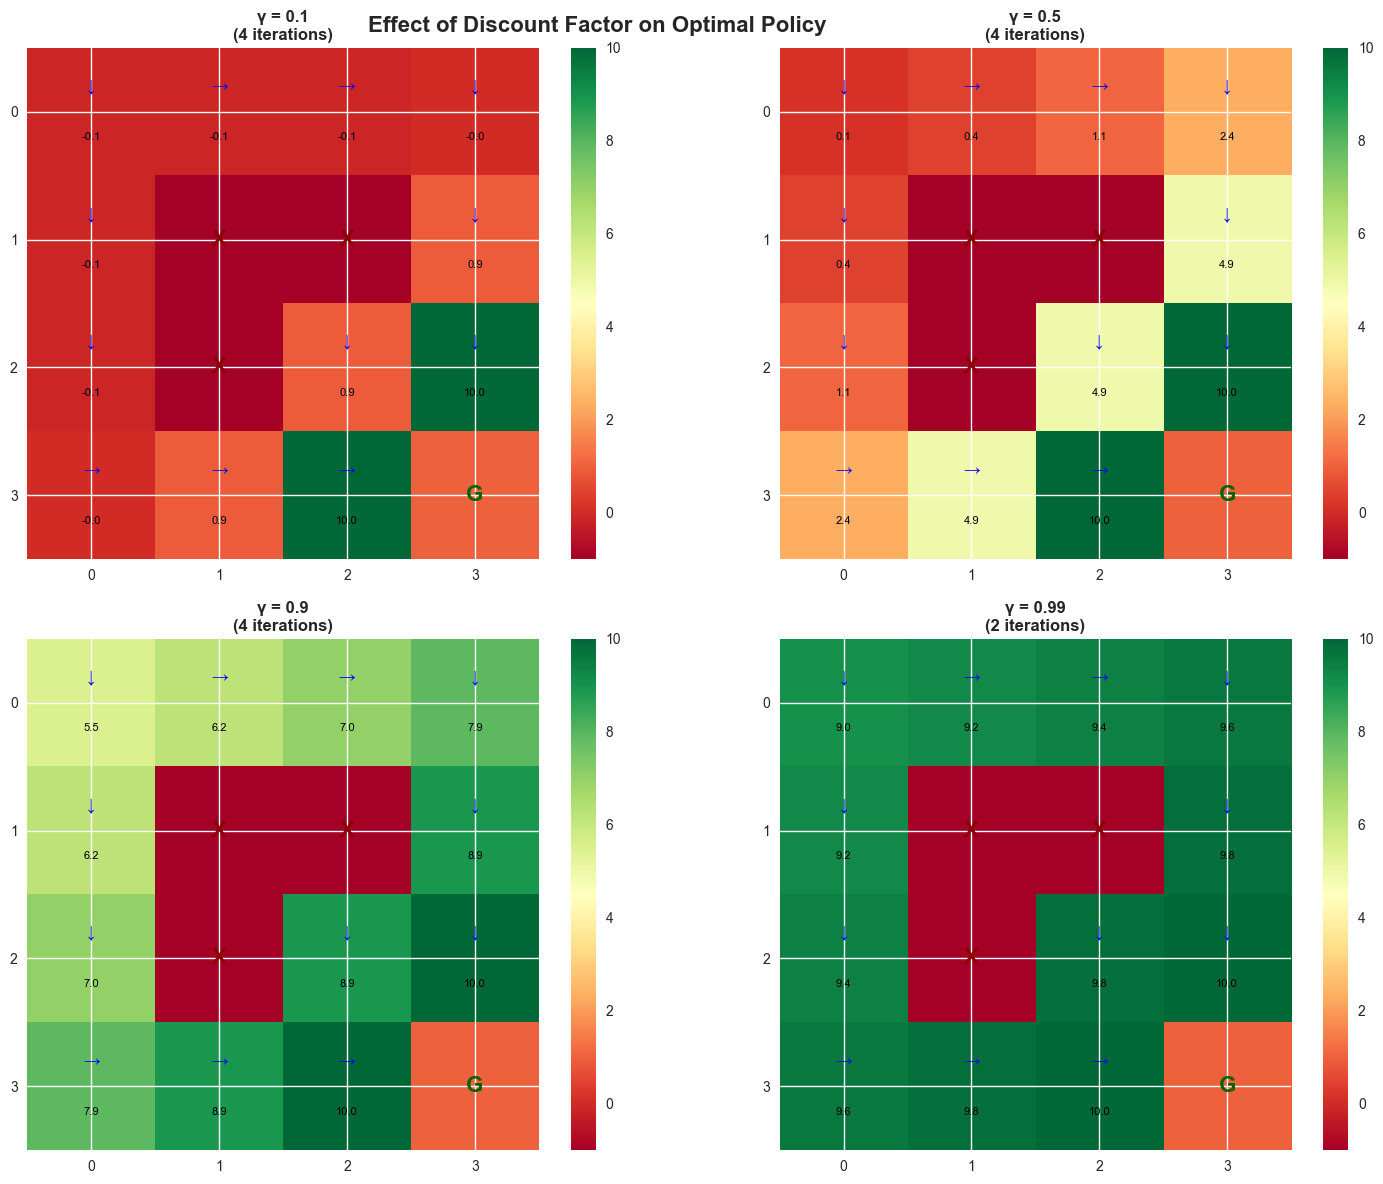


Value Analysis for Different Gamma Values:
State		γ=0.1	γ=0.5	γ=0.9	γ=0.99
------------------------------------------------------------
(0, 0)		-0.11	0.12	5.50	9.02
(1, 0)		-0.11	0.44	6.22	9.21
(2, 0)		-0.10	1.07	7.02	9.41
(0, 1)		-0.11	0.44	6.22	9.21
(2, 2)		0.90	4.90	8.90	9.80

Observations:
- Lower γ → More myopic behavior (focus on immediate rewards)
- Higher γ → More farsighted behavior (plan for long-term rewards)
- γ affects convergence speed and final values


In [12]:
# Experiment with different discount factors
gamma_values = [0.1, 0.5, 0.9, 0.99]

print("Experimenting with Different Discount Factors:")
print("=" * 60)

results = {}
for gamma in gamma_values:
    print(f"\nγ = {gamma}")
    print("-" * 20)
    
    # Run policy iteration
    opt_policy, V_hist, _ = policy_iteration(env, RandomPolicy(env), gamma=gamma, max_iterations=20)
    
    # Store results
    results[gamma] = {
        'policy': opt_policy,
        'values': V_hist[-1],
        'iterations': len(V_hist)
    }
    
    print(f"Converged in {len(V_hist)} iterations")

# Visualize policies for different gamma values
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for idx, gamma in enumerate(gamma_values):
    ax = axes[idx // 2, idx % 2]
    
    policy = results[gamma]['policy']
    V = results[gamma]['values']
    
    # Create policy visualization
    grid = np.zeros((env.size, env.size))
    for i, j in env.obstacles:
        grid[i, j] = -1
    goal_i, goal_j = env.goal_state
    grid[goal_i, goal_j] = 1
    
    # Add values
    for i in range(env.size):
        for j in range(env.size):
            state = (i, j)
            if state not in env.obstacles and state != env.goal_state:
                grid[i, j] = V[state]
    
    im = ax.imshow(grid, cmap='RdYlGn', aspect='equal')
    
    # Add arrows and values
    arrow_map = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→'}
    for i in range(env.size):
        for j in range(env.size):
            state = (i, j)
            if state == env.goal_state:
                ax.text(j, i, 'G', ha='center', va='center', 
                       fontsize=16, fontweight='bold', color='darkgreen')
            elif state in env.obstacles:
                ax.text(j, i, 'X', ha='center', va='center', 
                       fontsize=16, fontweight='bold', color='darkred')
            else:
                # Show optimal action
                action_probs = policy.get_action_probs(state)
                if action_probs:
                    best_action = max(action_probs.items(), key=lambda x: x[1])[0]
                    arrow = arrow_map.get(best_action, '?')
                    ax.text(j, i-0.2, arrow, ha='center', va='center', 
                           fontsize=12, fontweight='bold', color='blue')
                # Show value
                ax.text(j, i+0.2, f'{V[state]:.1f}', ha='center', va='center', 
                       fontsize=8, color='black')
    
    ax.set_title(f'γ = {gamma}\n({results[gamma]["iterations"]} iterations)', 
                fontsize=12, fontweight='bold')
    ax.set_xticks(range(env.size))
    ax.set_yticks(range(env.size))
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.suptitle('Effect of Discount Factor on Optimal Policy', fontsize=16, fontweight='bold')
plt.show()

# Analyze the effect of gamma on specific states
print("\nValue Analysis for Different Gamma Values:")
print("State\t\t" + "\t".join([f"γ={g}" for g in gamma_values]))
print("-" * 60)

sample_states = [(0,0), (1,0), (2,0), (0,1), (2,2)]
for state in sample_states:
    values_str = "\t".join([f"{results[g]['values'][state]:.2f}" for g in gamma_values])
    print(f"{state}\t\t{values_str}")

print("\nObservations:")
print("- Lower γ → More myopic behavior (focus on immediate rewards)")
print("- Higher γ → More farsighted behavior (plan for long-term rewards)")
print("- γ affects convergence speed and final values")

### Exercise 5.2: Modified Environment Experiments

**Task A**: Modify the reward structure and analyze how it affects the optimal policy:
- Change step reward from -0.1 to -1.0 (higher cost for each step)
- Change goal reward from 10 to 5
- Add positive rewards for certain states

**Task B**: Experiment with different obstacle configurations:
- Remove some obstacles
- Add more obstacles
- Change obstacle positions

**Task C**: Test with different starting positions and analyze convergence.

Experiment A: Modified Reward Structure
Original vs Modified Environment:
Original: goal=10, step=-0.1, obstacle=-5
Modified: goal=5, step=-1.0, obstacle=-10
Starting Policy Iteration...

Iteration 1:
  - Policy Evaluation...
Policy evaluation converged after 72 iterations
  - Policy Improvement...
  → Policy changed, continuing...

Iteration 2:
  - Policy Evaluation...
Policy evaluation converged after 7 iterations
  - Policy Improvement...

  ✓ Policy converged after 2 iterations!

Modified Environment Results:
Converged in 2 iterations

Original Environment:


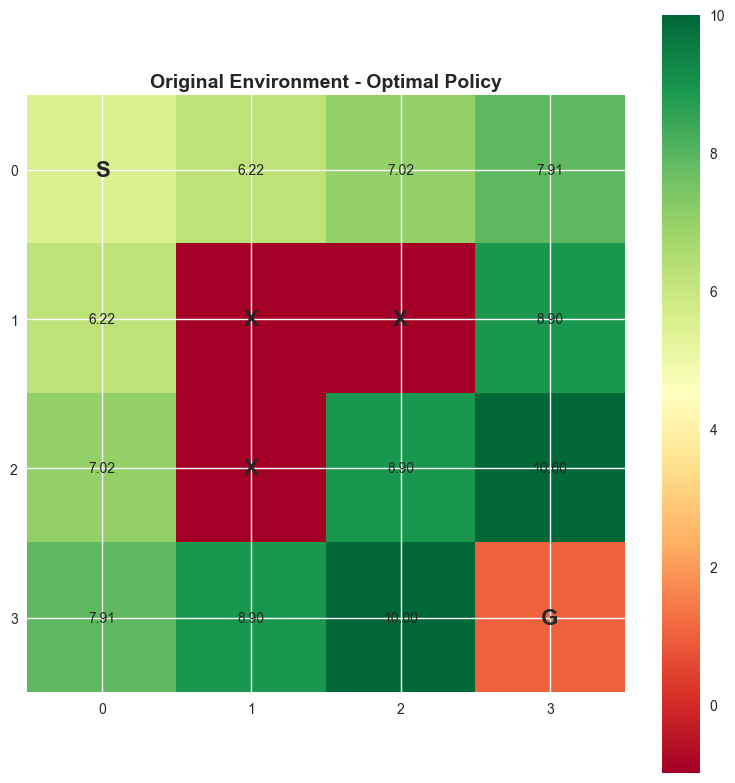


Modified Environment:


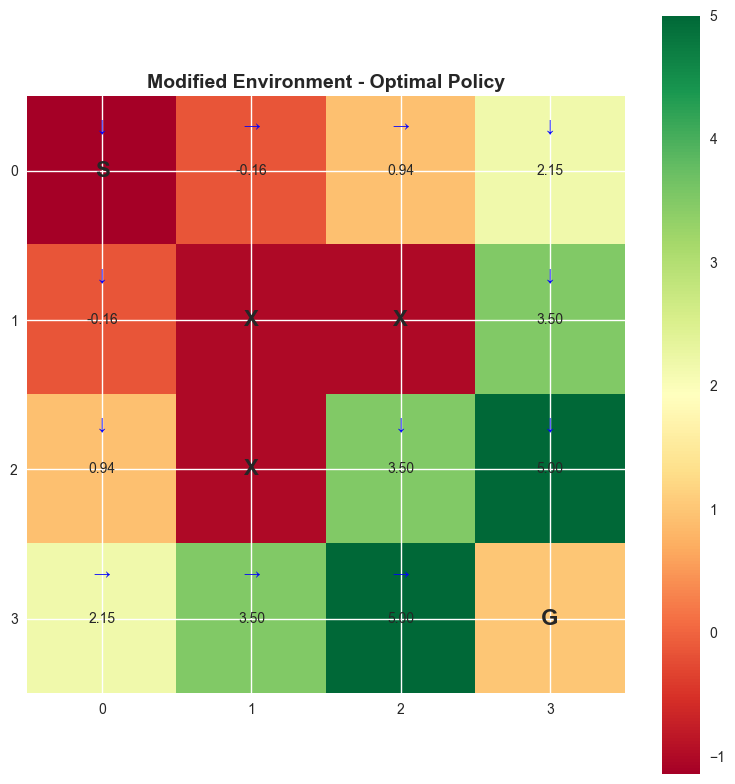


Value Comparison (sample states):
State		Original	Modified	Difference
--------------------------------------------------
(0, 0)		5.50		-1.14		-6.64
(1, 0)		6.22		-0.16		-6.38
(2, 0)		7.02		0.94		-6.08
(2, 2)		8.90		3.50		-5.40

Observations:
- Higher step cost (-1.0 vs -0.1) makes agent more eager to reach goal quickly
- Lower goal reward (5 vs 10) reduces overall state values
- Higher obstacle penalty (-10 vs -5) makes agent more cautious around obstacles

Experiment B: Different Obstacle Configurations
Starting Policy Iteration...

Iteration 1:
  - Policy Evaluation...
Policy evaluation converged after 86 iterations
  - Policy Improvement...
  → Policy changed, continuing...

Iteration 2:
  - Policy Evaluation...
Policy evaluation converged after 154 iterations
  - Policy Improvement...
  → Policy changed, continuing...

Iteration 3:
  - Policy Evaluation...
Policy evaluation converged after 7 iterations
  - Policy Improvement...
  → Policy changed, continuing...

Iteration 2:
  - P

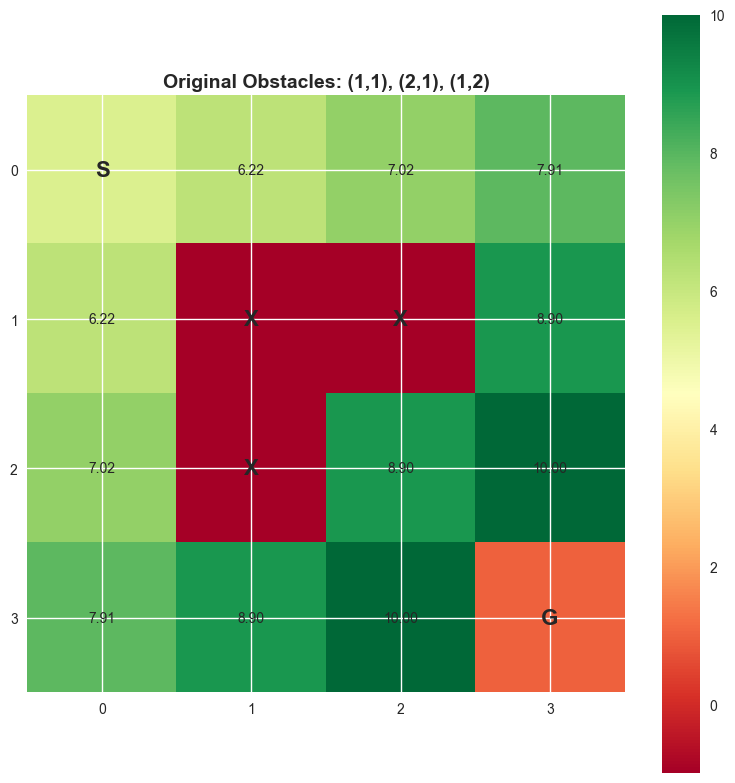


Fewer Obstacles Configuration:


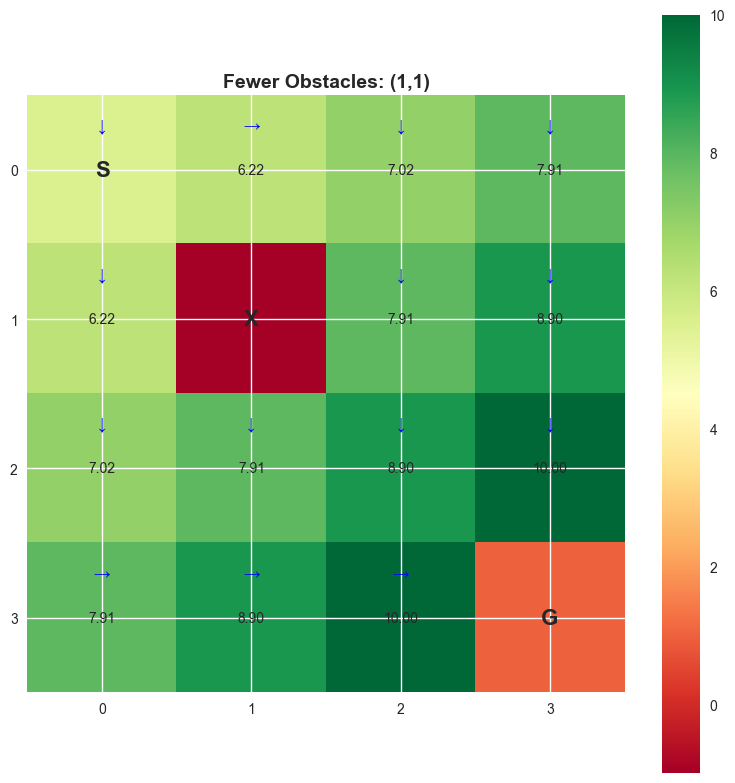


Different Obstacles Configuration:


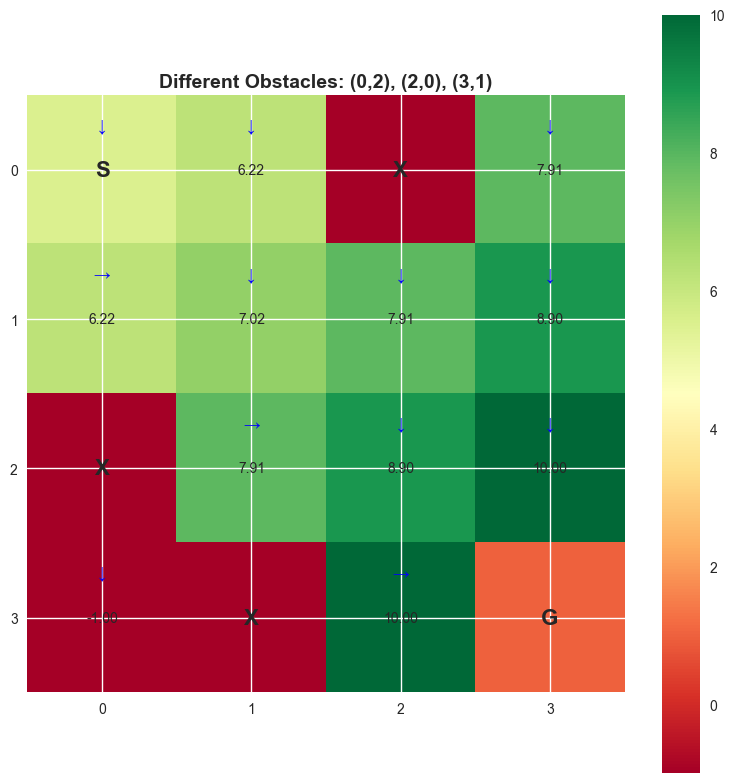


Observation Summary:
- Fewer obstacles: Higher overall values, more direct paths available
- Different positions: Changes optimal policy significantly
- Obstacle placement critically affects navigation strategies

Use the create_custom_environment function to create your own environments!


In [15]:
# Experiment A - Modified Reward Structure
print("Experiment A: Modified Reward Structure")
print("=" * 40)

# Create environment with different rewards
env_modified = GridWorld(size=4, goal_reward=5, step_reward=-1.0, obstacle_reward=-10)

print("Original vs Modified Environment:")
print(f"Original: goal={env.goal_reward}, step={env.step_reward}, obstacle={env.obstacle_reward}")
print(f"Modified: goal={env_modified.goal_reward}, step={env_modified.step_reward}, obstacle={env_modified.obstacle_reward}")

# Run policy iteration on modified environment
modified_policy, modified_V_hist, _ = policy_iteration(env_modified, RandomPolicy(env_modified), gamma=0.9)

# Compare with original results
print("\nModified Environment Results:")
print(f"Converged in {len(modified_V_hist)} iterations")

# Get final values and policy from modified environment
modified_V_final = modified_V_hist[-1]
modified_policy_dict = {}
for state in env_modified.states:
    if state != env_modified.goal_state and state not in env_modified.obstacles:
        action_probs = modified_policy.get_action_probs(state)
        if action_probs:
            best_action = max(action_probs.items(), key=lambda x: x[1])[0]
            modified_policy_dict[state] = best_action

# Visualize original environment
print("\nOriginal Environment:")
env.visualize_grid(values=V_greedy, title="Original Environment - Optimal Policy")

# Visualize modified environment
print("\nModified Environment:")
env_modified.visualize_grid(values=modified_V_final, policy=modified_policy_dict,
                           title="Modified Environment - Optimal Policy")

# Compare state values
print("\nValue Comparison (sample states):")
print("State\t\tOriginal\tModified\tDifference")
print("-" * 50)
sample_states = [(0,0), (1,0), (2,0), (2,2)]
for state in sample_states:
    orig_val = V_greedy.get(state, 0)
    mod_val = modified_V_final.get(state, 0)
    diff = mod_val - orig_val
    print(f"{state}\t\t{orig_val:.2f}\t\t{mod_val:.2f}\t\t{diff:.2f}")

print("\nObservations:")
print("- Higher step cost (-1.0 vs -0.1) makes agent more eager to reach goal quickly")
print("- Lower goal reward (5 vs 10) reduces overall state values")
print("- Higher obstacle penalty (-10 vs -5) makes agent more cautious around obstacles")

print("\n" + "="*60)
print("Experiment B: Different Obstacle Configurations")
print("=" * 60)

# Create environment with fewer obstacles
env_fewer_obstacles = GridWorld(size=4, goal_reward=10, step_reward=-0.1, obstacle_reward=-5)
env_fewer_obstacles.obstacles = [(1,1)]  # Only one obstacle instead of three
env_fewer_obstacles._build_transition_model()

# Run policy iteration
policy_fewer_obs, V_hist_fewer, _ = policy_iteration(env_fewer_obstacles, 
                                                    RandomPolicy(env_fewer_obstacles), gamma=0.9)

print(f"Fewer obstacles environment converged in {len(V_hist_fewer)} iterations")

# Create environment with different obstacle positions
env_diff_obstacles = GridWorld(size=4, goal_reward=10, step_reward=-0.1, obstacle_reward=-5)
env_diff_obstacles.obstacles = [(0,2), (2,0), (3,1)]  # Different positions
env_diff_obstacles._build_transition_model()

# Run policy iteration
policy_diff_obs, V_hist_diff, _ = policy_iteration(env_diff_obstacles, 
                                                  RandomPolicy(env_diff_obstacles), gamma=0.9)

print(f"Different obstacles environment converged in {len(V_hist_diff)} iterations")

# Visualize all three obstacle configurations
print("\nOriginal Obstacles Configuration:")
env.visualize_grid(values=V_greedy, title="Original Obstacles: (1,1), (2,1), (1,2)")

print("\nFewer Obstacles Configuration:")
V_final_fewer = V_hist_fewer[-1]
policy_dict_fewer = {}
for state in env_fewer_obstacles.states:
    if state != env_fewer_obstacles.goal_state and state not in env_fewer_obstacles.obstacles:
        action_probs = policy_fewer_obs.get_action_probs(state)
        if action_probs:
            best_action = max(action_probs.items(), key=lambda x: x[1])[0]
            policy_dict_fewer[state] = best_action

env_fewer_obstacles.visualize_grid(values=V_final_fewer, policy=policy_dict_fewer,
                                  title="Fewer Obstacles: (1,1)")

print("\nDifferent Obstacles Configuration:")
V_final_diff = V_hist_diff[-1]
policy_dict_diff = {}
for state in env_diff_obstacles.states:
    if state != env_diff_obstacles.goal_state and state not in env_diff_obstacles.obstacles:
        action_probs = policy_diff_obs.get_action_probs(state)
        if action_probs:
            best_action = max(action_probs.items(), key=lambda x: x[1])[0]
            policy_dict_diff[state] = best_action

env_diff_obstacles.visualize_grid(values=V_final_diff, policy=policy_dict_diff,
                                 title="Different Obstacles: (0,2), (2,0), (3,1)")

print("\nObservation Summary:")
print("- Fewer obstacles: Higher overall values, more direct paths available")
print("- Different positions: Changes optimal policy significantly")
print("- Obstacle placement critically affects navigation strategies")

print("\n" + "="*60)

# Template for creating different environments
def create_custom_environment(size=4, goal_reward=10, step_reward=-0.1, 
                             obstacle_reward=-5, obstacles=None):
    """Create a custom GridWorld environment"""
    env = GridWorld(size, goal_reward, step_reward, obstacle_reward)
    if obstacles:
        env.obstacles = obstacles
        env._build_transition_model()  # Rebuild transition model
    return env

# Example: Environment with fewer obstacles
# env_few_obstacles = create_custom_environment(obstacles=[(1, 1)])
# TODO: Test this environment

print("Use the create_custom_environment function to create your own environments!")

## Part 6: Summary and Key Takeaways

### What We've Learned

**1. Markov Decision Processes (MDPs):**
-   **Framework**: Sequential decision making under uncertainty
-   **Components**: (S, A, P, R, γ) - states, actions, transitions, rewards, discount
-   **Markov Property**: Future depends only on current state, not history
-   **Foundation**: Mathematical basis for all RL algorithms

**2. Value Functions:**
-   **V^π(s)**: Expected return starting from state s following policy π  
-   **Q^π(s,a)**: Expected return taking action a in state s, then following π
-   **Relationship**: V^π(s) = Σ_a π(a|s) Q^π(s,a)
-   **Purpose**: Measure "goodness" of states and actions

**3. Bellman Equations:**
-   **For V**: V^π(s) = Σ_a π(a|s) Σ_{s'} P(s'|s,a)[R(s,a,s') + γV^π(s')]
-   **For Q**: Q^π(s,a) = Σ_{s'} P(s'|s,a)[R(s,a,s') + γ Σ_{a'} π(a'|s')Q^π(s',a')]
-   **Significance**: Recursive relationship enabling dynamic programming solutions

**4. Policy Evaluation:**
-   **Algorithm**: Iterative method to compute V^π given policy π
-   **Convergence**: Guaranteed for finite MDPs with γ < 1
-   **Application**: Foundation for policy iteration and value iteration

**5. Policy Improvement:**
-   **Theorem**: Greedy policy w.r.t. V^π is at least as good as π
-   **Formula**: π'(s) = argmax_a Q^π(s,a)
-   **Monotonicity**: Each improvement step yields better or equal policy

**6. Policy Iteration:**
-   **Algorithm**: Alternates between evaluation and improvement
-   **Guarantee**: Converges to optimal policy π*
-   **Efficiency**: Usually converges in few iterations

---

### Key Insights from Experiments

**Discount Factor (γ) Effects:**
-   **Low γ**: Myopic behavior, focuses on immediate rewards
-   **High γ**: Farsighted behavior, considers long-term consequences
-   **Trade-off**: Convergence speed vs solution quality

**Environment Structure Impact:**
-   **Reward structure**: Significantly affects optimal policy
-   **Obstacles**: Create navigation challenges requiring planning
-   **Starting position**: Can influence learning dynamics

**Algorithm Characteristics:**
-   **Model-based**: Requires knowledge of P(s'|s,a) and R(s,a,s')
-   **Exact solution**: Finds truly optimal policy (unlike approximate methods)
-   **Computational cost**: Scales with state space size

---

### Connections to Advanced Topics

**What This Enables:**
-   **Value Iteration**: Direct optimization of value function
-   **Q-Learning**: Model-free learning of action-value functions
-   **Deep RL**: Neural network function approximation
-   **Policy Gradients**: Direct policy optimization methods

**Next Steps in Learning:**
-   **Temporal Difference Learning**: Learn from incomplete episodes
-   **Function Approximation**: Handle large/continuous state spaces
-   **Exploration vs Exploitation**: Balance learning and performance
-   **Multi-agent Systems**: Multiple learning agents interacting

---

### Reflection Questions

**Theoretical Understanding:**
1. How would stochastic transitions affect the optimal policy?
2. What happens with continuous state or action spaces?
3. How do we handle unknown environment dynamics?
4. What are computational limits for large state spaces?

**Practical Applications:**
1. How could you apply MDPs to real-world decision problems?
2. What modifications would be needed for competitive scenarios?
3. How would you handle partially observable environments?
4. What safety considerations are important in RL applications?

### 🧠 Common Misconceptions and Intuitive Understanding

Before we wrap up, let's address some common confusions and solidify understanding:

#### **❌ Common Misconceptions**

**1. "Value functions are just rewards"**
- ❌ Wrong: V(s) ≠ R(s)  
- ✅ Correct: V(s) = Expected total future reward from state s
- 🔍 Think: V(s) is like your bank account balance, R(s) is your daily income

**2. "Q(s,a) tells me the best action"**
- ❌ Wrong: Q(s,a) is not binary good/bad
- ✅ Correct: Q(s,a) is the expected value of taking action a
- 🔍 Think: Compare Q-values to choose best action: argmax_a Q(s,a)

**3. "Policy iteration always takes many steps"**
- ❌ Wrong: Often converges in 2-4 iterations
- ✅ Correct: Convergence is usually very fast
- 🔍 Think: Once you find a good strategy, small improvements are enough

**4. "Random policy is always bad"**
- ❌ Wrong: Random policy can be good for exploration
- ✅ Correct: Depends on environment and goals
- 🔍 Think: Sometimes trying new things leads to better discoveries

#### **🎯 Key Intuitions to Remember**

**1. The Big Picture Flow**:
```
Environment → Policy → Actions → Rewards → Better Policy → Repeat
```

**2. Value Functions as GPS**:
- V(s): "How good is this location overall?"
- Q(s,a): "How good is taking this road from this location?"

**3. Bellman Equations as Consistency**:
- "My value should equal immediate reward + discounted future value"
- Like: "My wealth = today's income + tomorrow's wealth"

**4. Policy Improvement as Learning**:
- "If I know what each action leads to, I can choose better actions"
- Like: "If I know exam results for each study method, I can study better"

#### **🔧 Troubleshooting Guide**

**If values don't converge**:
- Check if γ < 1 
- Reduce convergence threshold (theta)
- Check for bugs in transition probabilities

**If policy doesn't improve**:
- Environment might be too simple (already optimal)
- Check reward structure - might need more differentiation
- Verify policy improvement logic

**If results seem weird**:
- Visualize value functions and policies
- Start with simpler environment
- Check reward signs (positive/negative)

#### **🚀 Connecting to Future Topics**

What we learned here enables:
- **Value Iteration**: Direct value optimization (next week!)
- **Q-Learning**: Learn Q-values without knowing the model
- **Deep RL**: Use neural networks to handle large state spaces
- **Policy Gradients**: Directly optimize the policy parameters

#### **🎭 The RL Mindset**

Think like an RL agent:
1. **Observe** your current situation (state)
2. **Consider** your options (actions) 
3. **Predict** outcomes (use your model/experience)
4. **Choose** the best option (policy)
5. **Learn** from results (update values/policy)
6. **Repeat** until mastery

This mindset applies to:
- Career decisions
- Investment choices  
- Game strategies
- Daily life optimization

In [16]:
# Final Code Cell - Additional Experiments and Testing

print("🎯 Congratulations! You've completed the Deep Reinforcement Learning Session 2 Exercise")
print("=" * 80)

print("\n📋 Summary of Implemented Components:")
print("✓ GridWorld Environment")
print("✓ Policy Classes (Random, Greedy, Custom)")
print("✓ Policy Evaluation Algorithm")
print("✓ Q-value Computation")
print("✓ Policy Improvement")
print("✓ Policy Iteration Algorithm")
print("✓ Convergence Analysis")
print("✓ Discount Factor Experiments")

print("\n🧪 Optional Challenges:")
print("1. Implement Value Iteration algorithm")
print("2. Add stochastic transitions (wind, slippery grid)")
print("3. Create larger grid worlds (8x8, 10x10)")
print("4. Implement different policy representation (soft-max, epsilon-greedy)")
print("5. Add time-dependent rewards")

print("\n💡 Use this space for your additional experiments:")
print("# Your custom experiments go here...")

# Example: Quick test of your understanding
def quick_test():
    """Quick test to verify understanding"""
    print("\n🔍 Quick Understanding Test:")
    
    # Create a simple 2x2 grid for testing
    test_env = GridWorld(size=2, goal_reward=1, step_reward=0, obstacle_reward=0)
    test_env.obstacles = []  # Remove obstacles for simplicity
    test_env._build_transition_model()
    
    # Test policy evaluation
    random_pol = RandomPolicy(test_env)
    V_test = policy_evaluation(test_env, random_pol, gamma=0.9, theta=1e-10)
    
    print(f"Simple 2x2 grid values: {V_test}")
    print("Expected: Values should decrease as we move away from goal (1,1)")
    
    return V_test

# Run quick test
# quick_test()

print("\n🚀 Ready for the next session: Temporal Difference Learning!")
print("Keep experimenting and happy learning! 🤖")

🎯 Congratulations! You've completed the Deep Reinforcement Learning Session 2 Exercise

📋 Summary of Implemented Components:
✓ GridWorld Environment
✓ Policy Classes (Random, Greedy, Custom)
✓ Policy Evaluation Algorithm
✓ Q-value Computation
✓ Policy Improvement
✓ Policy Iteration Algorithm
✓ Convergence Analysis
✓ Discount Factor Experiments

🧪 Optional Challenges:
1. Implement Value Iteration algorithm
2. Add stochastic transitions (wind, slippery grid)
3. Create larger grid worlds (8x8, 10x10)
4. Implement different policy representation (soft-max, epsilon-greedy)
5. Add time-dependent rewards

💡 Use this space for your additional experiments:
# Your custom experiments go here...

🚀 Ready for the next session: Temporal Difference Learning!
Keep experimenting and happy learning! 🤖


In [18]:
# 🎯 INTERACTIVE LEARNING EXERCISES
print("=" * 80)
print("🎓 SELF-CHECK QUESTIONS - Test Your Understanding!")
print("=" * 80)

def self_check_questions():
    """
    Interactive questions to test understanding
    Run this function and think about your answers before revealing the solutions
    """
    
    questions = [
        {
            "q": "🤔 Q1: If γ = 0, what does the agent care about?",
            "options": ["A) Only immediate rewards", "B) All future rewards equally", "C) Long-term rewards more"],
            "answer": "A",
            "explanation": "γ=0 means future rewards are multiplied by 0, so only immediate rewards matter!"
        },
        {
            "q": "🤔 Q2: What does V(s) represent?",
            "options": ["A) Immediate reward in state s", "B) Best action in state s", "C) Expected future reward from state s"],
            "answer": "C", 
            "explanation": "V(s) is the expected cumulative reward starting from state s and following the policy."
        },
        {
            "q": "🤔 Q3: How does policy iteration guarantee finding the optimal policy?",
            "options": ["A) Random exploration", "B) Monotonic improvement + finite policies", "C) Magic"],
            "answer": "B",
            "explanation": "Each iteration improves (or keeps same) policy, and there are finite possible policies, so must reach optimum!"
        },
        {
            "q": "🤔 Q4: In our GridWorld, why is the step reward negative?",
            "options": ["A) To punish the agent", "B) To encourage efficiency", "C) Random choice"],
            "answer": "B",
            "explanation": "Negative step reward encourages finding shorter paths - otherwise agent might wander forever!"
        }
    ]
    
    print("Think about each question, then uncomment the reveal_answers() call to see solutions!\n")
    
    for i, item in enumerate(questions, 1):
        print(f"{item['q']}")
        for option in item['options']:
            print(f"   {option}")
        print()
    
    def reveal_answers():
        print("🔍 ANSWERS AND EXPLANATIONS:")
        print("-" * 50)
        for i, item in enumerate(questions, 1):
            print(f"Q{i}: Answer is {item['answer']}")
            print(f"💡 Explanation: {item['explanation']}\n")
    
    return reveal_answers

# Run the self-check
reveal_function = self_check_questions()

# Uncomment the next line to reveal answers:
# reveal_function()

print("\n" + "="*80)
print("🏆 HANDS-ON CHALLENGES - Try These!")
print("="*80)

print("""
🚀 CHALLENGE 1: Modify the Environment
   - Create a 6x6 grid with different obstacle patterns
   - Try diagonal obstacles, maze-like structures
   - Compare how policies change

🚀 CHALLENGE 2: Custom Reward Structure  
   - Add "bonus" states with positive rewards
   - Create "danger" zones with high negative rewards
   - See how this affects optimal paths

🚀 CHALLENGE 3: Stochastic Environment
   - Modify transitions to be probabilistic
   - E.g., 80% chance of intended direction, 20% random
   - Compare convergence and policies

🚀 CHALLENGE 4: Analyze Different Starting Points
   - What if agent starts at different corners?
   - How does this change the value function?
   - Create heat maps for different starting positions

🚀 CHALLENGE 5: Policy Comparison
   - Implement epsilon-greedy policy (90% greedy, 10% random)  
   - Compare convergence speed vs quality
   - Which performs better in different scenarios?
""")

print("💡 DEBUGGING TIPS:")
print("-" * 30)
print("✓ Always visualize your results")
print("✓ Start with simple cases (2x2 grid)")
print("✓ Check that probabilities sum to 1")
print("✓ Verify rewards make intuitive sense")
print("✓ Use different γ values to understand behavior")

print(f"\n🎉 You've completed the comprehensive DRL Session 2 exercise!")
print(f"🌟 You now understand: MDPs, Policies, Value Functions, Bellman Equations, and Policy Iteration!")
print(f"🚀 Ready for more advanced topics like Q-learning and Deep RL!")

# Fun fact generator
import random
fun_facts = [
    "🤖 The Bellman equation is named after Richard Bellman, who also invented dynamic programming!",
    "🎮 Many modern game AIs use variations of the algorithms you just learned!",
    "🚗 Tesla's autopilot uses deep reinforcement learning for decision making!",
    "🏆 AlphaGo used policy iteration concepts to master the game of Go!",
    "💰 Wall Street uses RL algorithms for algorithmic trading!",
    "🎯 The epsilon-greedy strategy balances exploration vs exploitation - key in RL!"
]

print(f"\n🎲 Fun RL Fact: {random.choice(fun_facts)}")
print("\n" + "="*80)

🎓 SELF-CHECK QUESTIONS - Test Your Understanding!
Think about each question, then uncomment the reveal_answers() call to see solutions!

🤔 Q1: If γ = 0, what does the agent care about?
   A) Only immediate rewards
   B) All future rewards equally
   C) Long-term rewards more

🤔 Q2: What does V(s) represent?
   A) Immediate reward in state s
   B) Best action in state s
   C) Expected future reward from state s

🤔 Q3: How does policy iteration guarantee finding the optimal policy?
   A) Random exploration
   B) Monotonic improvement + finite policies
   C) Magic

🤔 Q4: In our GridWorld, why is the step reward negative?
   A) To punish the agent
   B) To encourage efficiency
   C) Random choice


🏆 HANDS-ON CHALLENGES - Try These!

🚀 CHALLENGE 1: Modify the Environment
   - Create a 6x6 grid with different obstacle patterns
   - Try diagonal obstacles, maze-like structures
   - Compare how policies change

🚀 CHALLENGE 2: Custom Reward Structure  
   - Add "bonus" states with positive rew